## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
from scipy import stats

# Libaries to help with data visualization
# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings('ignore')


# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [5]:
df = pd.read_csv('Train.csv')
dfTest=pd.read_csv('Test.csv')

## Data Overview

- Observations
- Sanity checks

In [7]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [9]:
df.shape

(20000, 41)

In [10]:
dfTest.shape

(5000, 41)

In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000,19982.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
mean,-0.272,0.440,2.485,-0.083,-0.054,-0.995,-0.879,-0.548,-0.017,-0.013,-1.895,1.605,1.580,-0.951,-2.415,-2.925,-0.134,1.189,1.182,0.024,-3.611,0.952,-0.366,1.134,-0.002,1.874,-0.612,-0.883,-0.986,-0.016,0.487,0.304,0.050,-0.463,2.230,1.515,0.011,-0.344,0.891,-0.876,0.056
std,3.442,3.151,3.389,3.432,2.105,2.041,1.762,3.296,2.161,2.193,3.124,2.930,2.875,1.790,3.355,4.222,3.345,2.592,3.397,3.669,3.568,1.652,4.032,3.912,2.017,3.435,4.369,1.918,2.684,3.005,3.461,5.500,3.575,3.184,2.937,3.801,1.788,3.948,1.753,3.012,0.229
min,-11.876,-12.320,-10.708,-15.082,-8.603,-10.227,-7.950,-15.658,-8.596,-9.854,-14.832,-12.948,-13.228,-7.739,-16.417,-20.374,-14.091,-11.644,-13.492,-13.923,-17.956,-10.122,-14.866,-16.387,-8.228,-11.834,-14.905,-9.269,-12.579,-14.796,-13.723,-19.877,-16.898,-17.985,-15.350,-14.833,-5.478,-17.375,-6.439,-11.024,0.000
25%,-2.737,-1.641,0.207,-2.348,-1.536,-2.347,-2.031,-2.643,-1.495,-1.411,-3.922,-0.397,-0.224,-2.171,-4.415,-5.634,-2.216,-0.404,-1.050,-2.433,-5.930,-0.118,-3.099,-1.468,-1.365,-0.338,-3.652,-2.171,-2.787,-1.867,-1.818,-3.420,-2.243,-2.137,0.336,-0.944,-1.256,-2.988,-0.272,-2.940,0.000
50%,-0.748,0.472,2.256,-0.135,-0.102,-1.001,-0.917,-0.389,-0.068,0.101,-1.921,1.508,1.637,-0.957,-2.383,-2.683,-0.015,0.883,1.279,0.033,-3.533,0.975,-0.262,0.969,0.025,1.951,-0.885,-0.891,-1.176,0.184,0.490,0.052,-0.066,-0.255,2.099,1.567,-0.128,-0.317,0.919,-0.921,0.000
75%,1.840,2.544,4.566,2.131,1.340,0.380,0.224,1.723,1.409,1.477,0.119,3.571,3.460,0.271,-0.359,-0.095,2.069,2.572,3.493,2.512,-1.266,2.026,2.452,3.546,1.397,4.130,2.189,0.376,0.630,2.036,2.731,3.762,2.255,1.437,4.064,3.984,1.176,2.279,2.058,1.120,0.000
max,15.493,13.089,17.091,13.236,8.134,6.976,8.006,11.679,8.138,8.108,11.826,15.081,15.420,5.671,12.246,13.583,16.756,13.180,13.238,16.052,13.840,7.410,14.459,17.163,8.223,16.836,17.560,6.528,10.722,12.506,17.255,23.633,16.692,14.358,15.291,19.330,7.467,15.290,7.760,10.654,1.000


In [12]:
dfTest.info()
dfTest.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,4995.000,4994.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,-0.278,0.398,2.552,-0.049,-0.080,-1.042,-0.908,-0.575,0.030,0.019,-2.009,1.576,1.622,-0.921,-2.452,-3.019,-0.104,1.196,1.210,0.138,-3.664,0.962,-0.422,1.089,0.061,1.847,-0.552,-0.868,-1.096,-0.119,0.469,0.233,-0.080,-0.393,2.211,1.595,0.023,-0.406,0.939,-0.932,0.056
std,3.466,3.140,3.327,3.414,2.111,2.005,1.769,3.332,2.174,2.145,3.112,2.907,2.883,1.803,3.387,4.264,3.337,2.586,3.385,3.657,3.578,1.640,4.057,3.968,2.010,3.400,4.403,1.926,2.655,3.023,3.446,5.586,3.539,3.166,2.948,3.775,1.785,3.969,1.717,2.978,0.231
min,-12.382,-10.716,-9.238,-14.682,-7.712,-8.924,-8.124,-12.253,-6.785,-8.171,-13.152,-8.164,-11.548,-7.814,-15.286,-20.986,-13.418,-12.214,-14.170,-13.720,-16.341,-6.740,-14.422,-12.316,-6.770,-11.414,-13.177,-7.933,-9.988,-12.438,-11.263,-17.244,-14.904,-14.700,-12.261,-12.736,-5.079,-15.335,-5.451,-10.076,0.000
25%,-2.744,-1.649,0.315,-2.293,-1.615,-2.369,-2.054,-2.642,-1.456,-1.353,-4.050,-0.450,-0.126,-2.111,-4.479,-5.648,-2.228,-0.409,-1.026,-2.325,-5.944,-0.048,-3.163,-1.623,-1.298,-0.242,-3.663,-2.160,-2.861,-1.997,-1.822,-3.556,-2.348,-2.010,0.322,-0.866,-1.241,-2.984,-0.208,-2.987,0.000
50%,-0.765,0.427,2.260,-0.146,-0.132,-1.049,-0.940,-0.358,-0.080,0.166,-2.043,1.488,1.719,-0.896,-2.417,-2.774,0.047,0.881,1.296,0.193,-3.663,0.986,-0.279,0.913,0.077,1.917,-0.872,-0.931,-1.341,0.112,0.486,-0.077,-0.160,-0.172,2.112,1.703,-0.110,-0.381,0.959,-1.003,0.000
75%,1.831,2.444,4.587,2.166,1.341,0.308,0.212,1.713,1.450,1.511,0.044,3.563,3.465,0.272,-0.433,-0.178,2.112,2.604,3.526,2.540,-1.330,2.029,2.426,3.537,1.428,4.156,2.247,0.421,0.522,1.946,2.779,3.752,2.099,1.465,4.032,4.104,1.238,2.288,2.131,1.080,0.000
max,13.504,14.079,15.315,12.140,7.673,5.068,7.616,10.415,8.851,6.599,9.956,12.984,12.620,5.734,11.673,13.976,19.777,13.642,12.428,13.871,11.047,7.505,13.181,17.806,6.557,17.528,17.290,7.416,14.039,10.315,12.559,26.539,13.324,12.146,13.489,17.116,6.810,13.065,7.182,8.698,1.000


In [13]:
df.duplicated().sum()

0

In [14]:
dfTest.duplicated().sum()

0

In [15]:
df.isna().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [16]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)


V1       0.090
V2       0.090
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

We will probably impute v1 and v2 missing values with median values as we see that the distrubution seems to be skewed

In [18]:
dfTest.isna().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

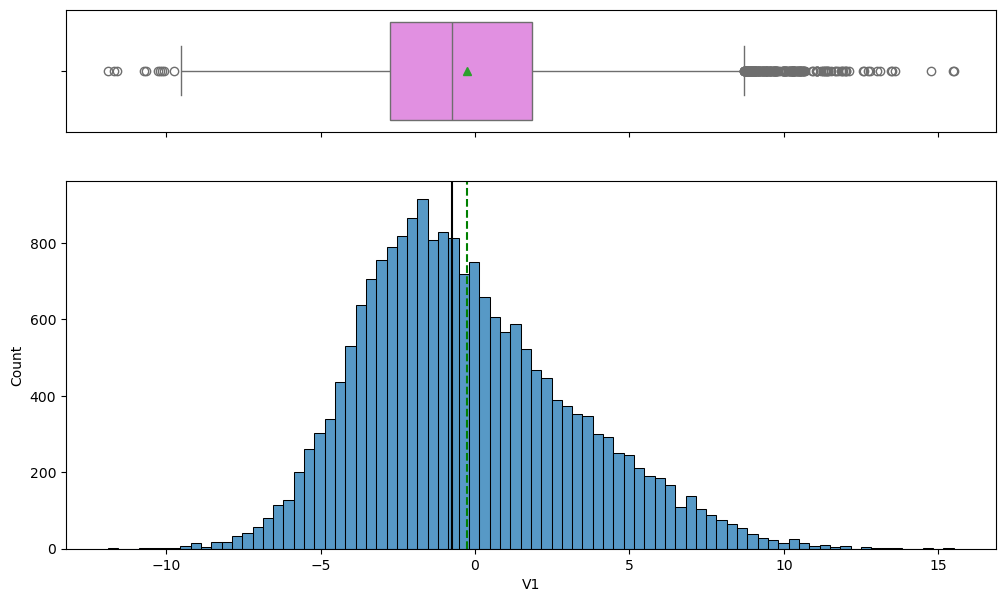

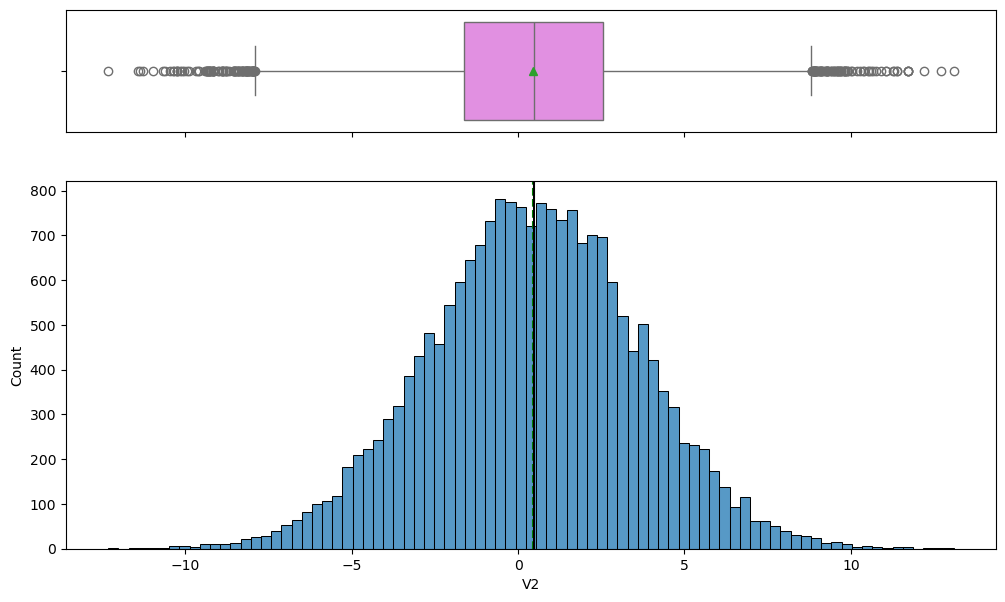

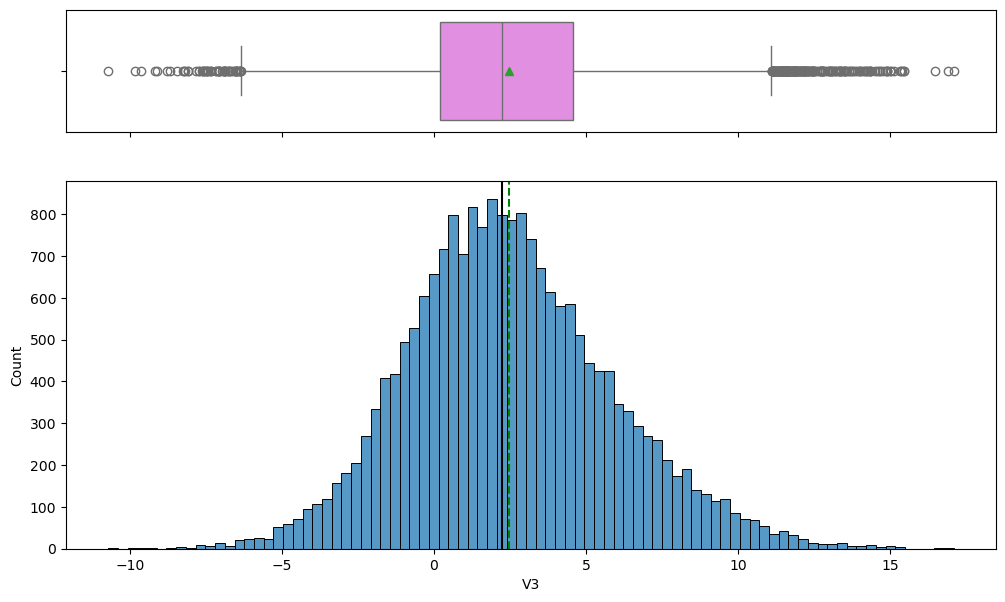

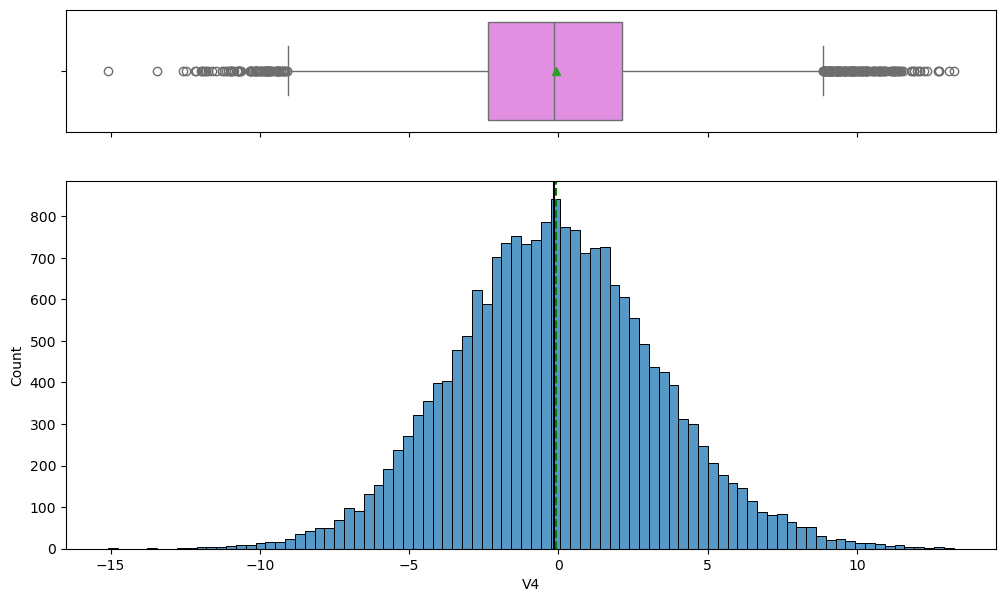

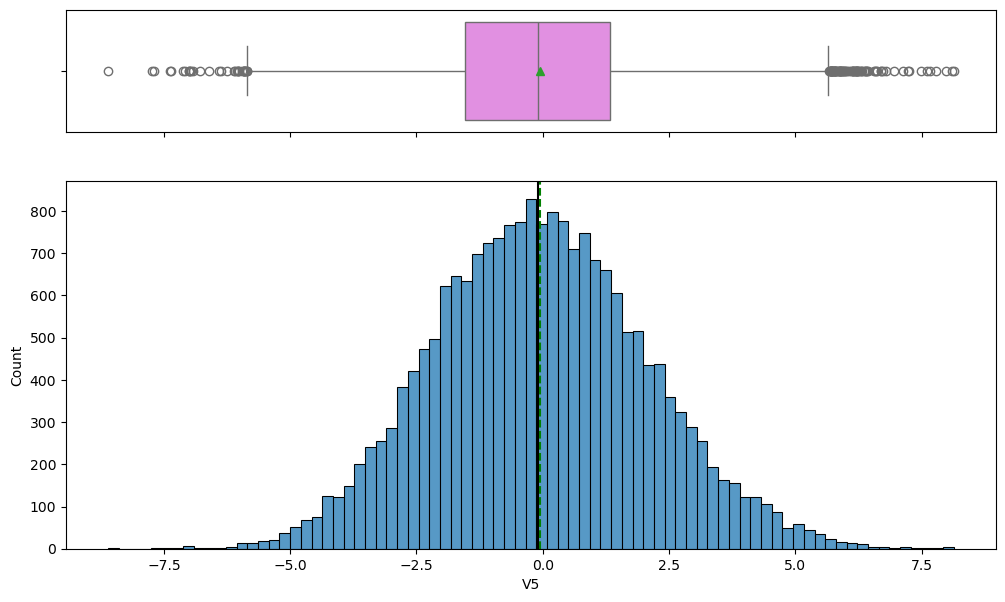

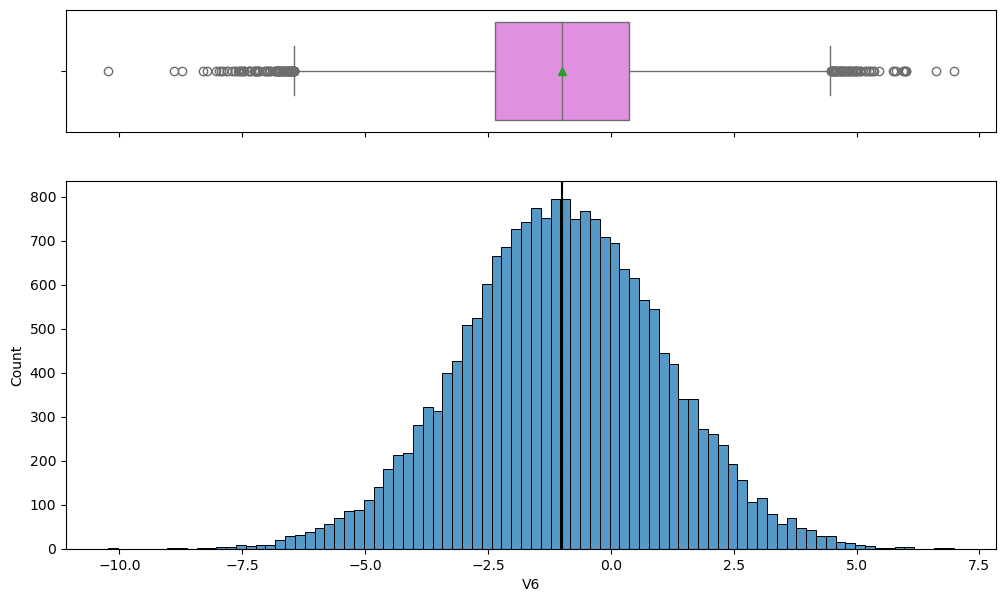

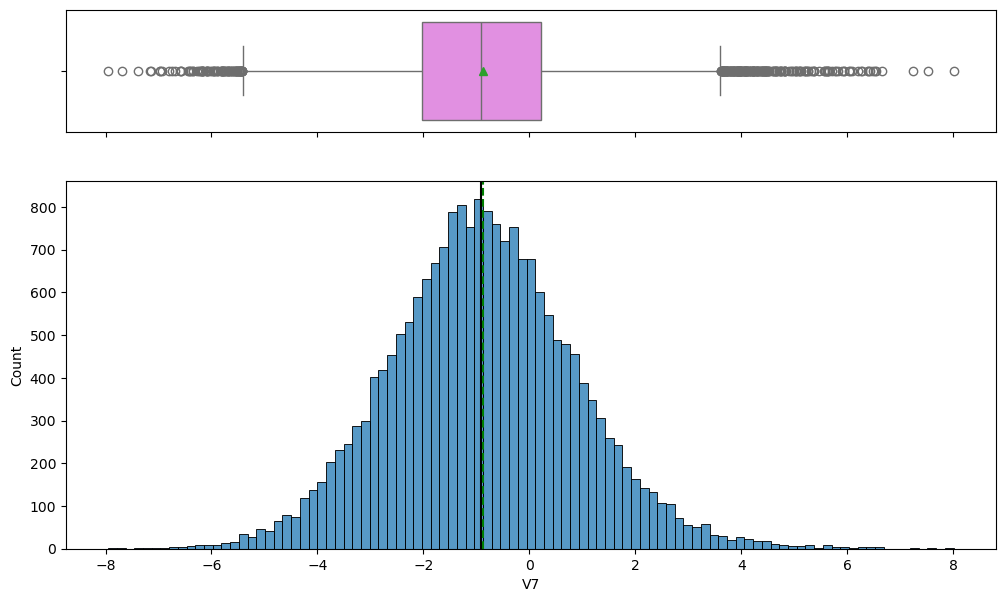

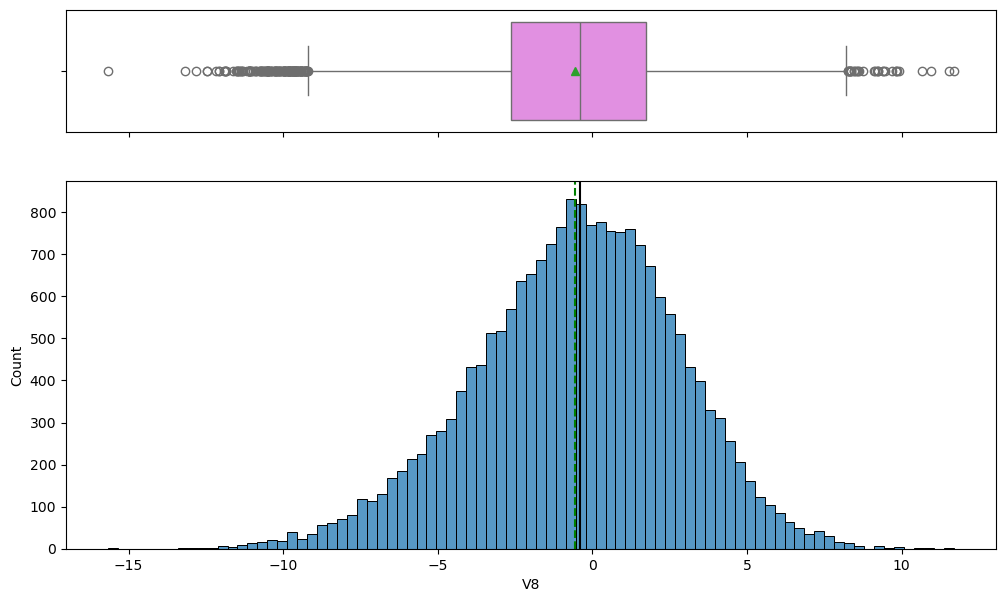

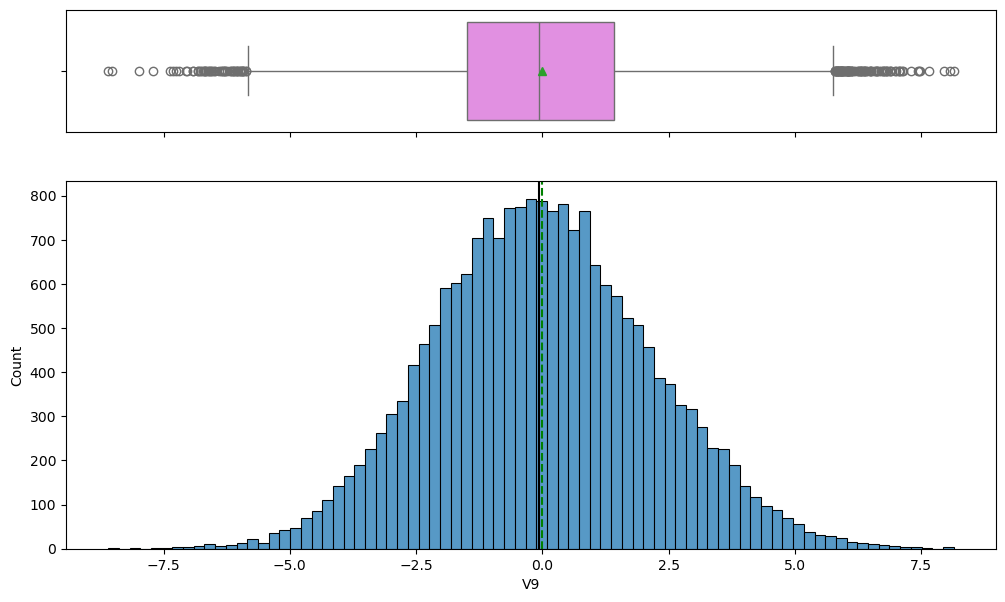

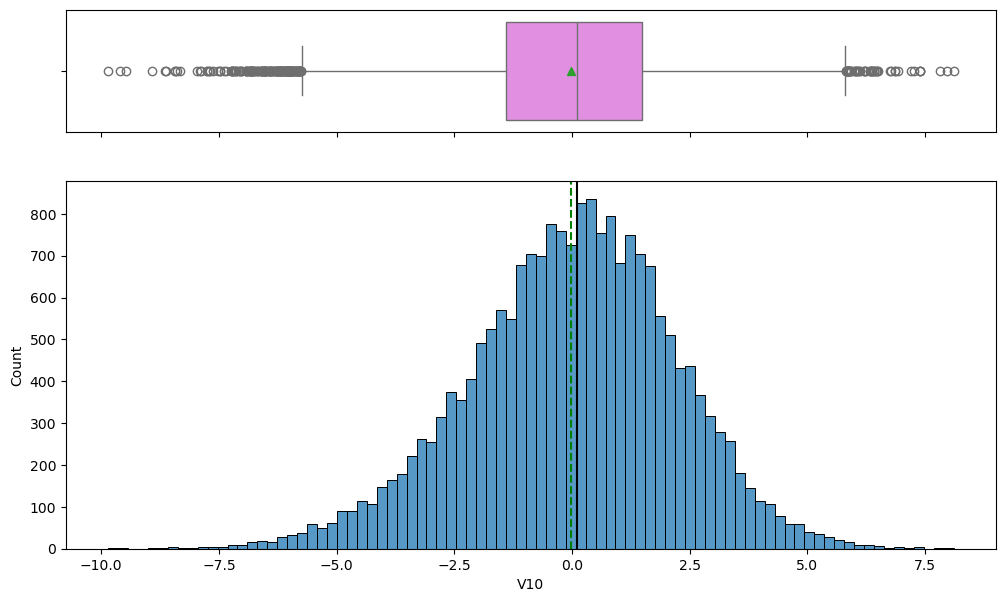

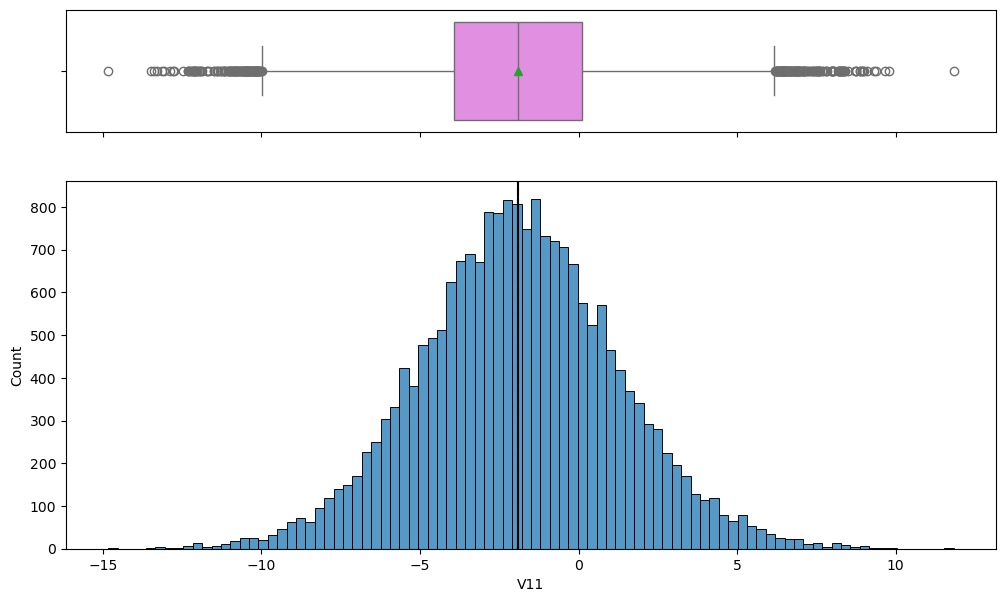

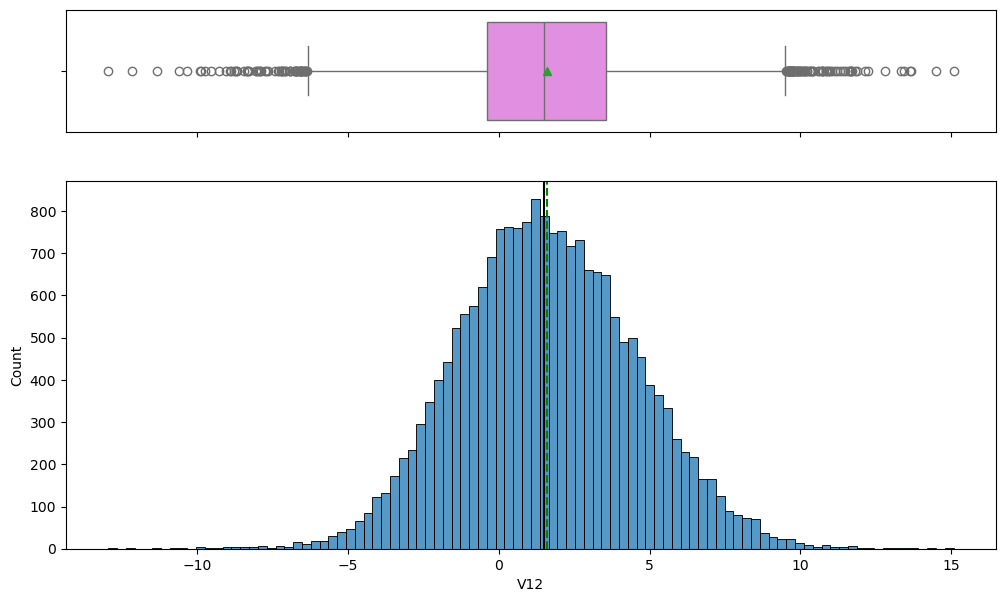

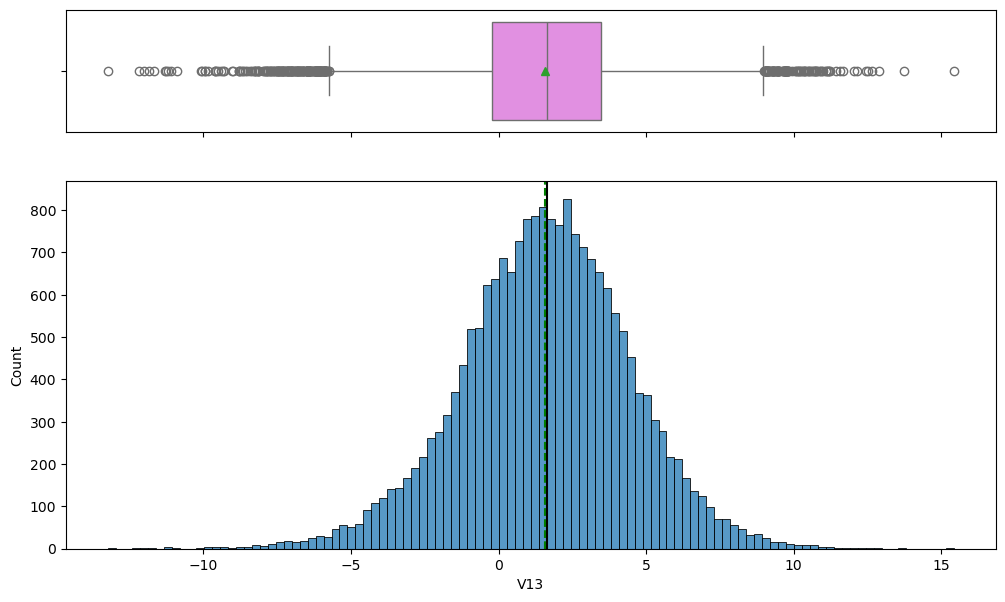

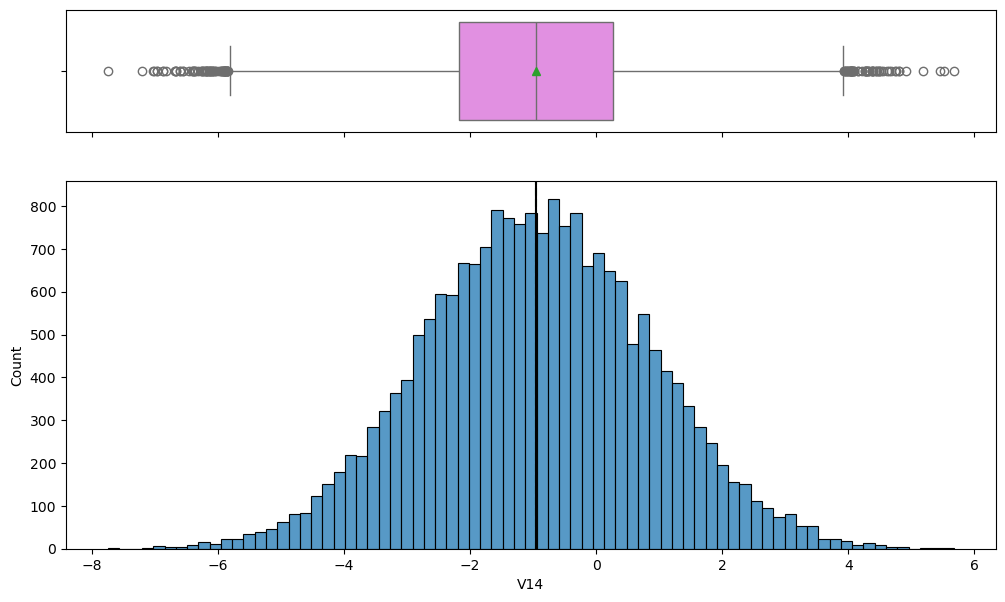

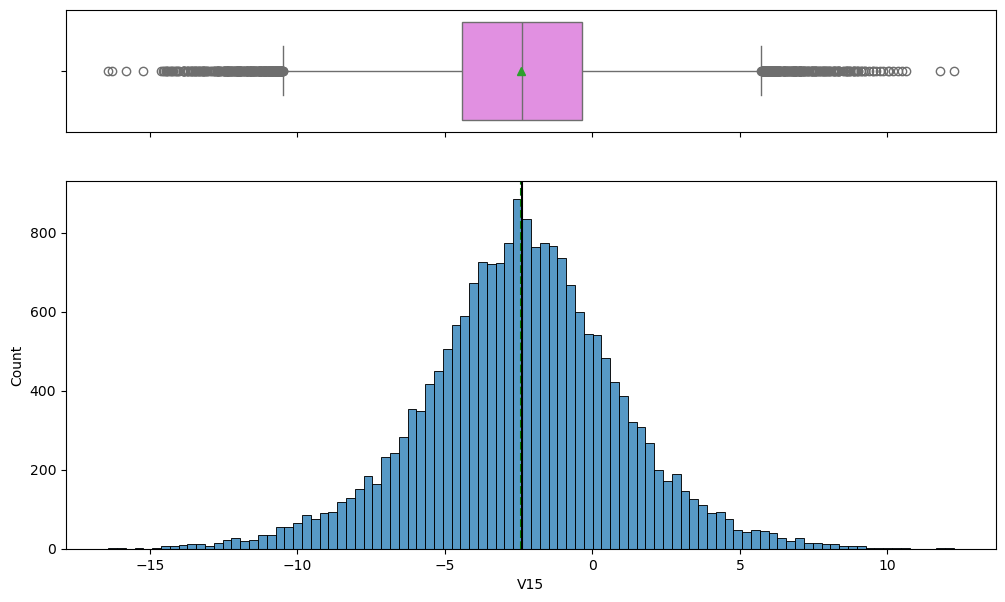

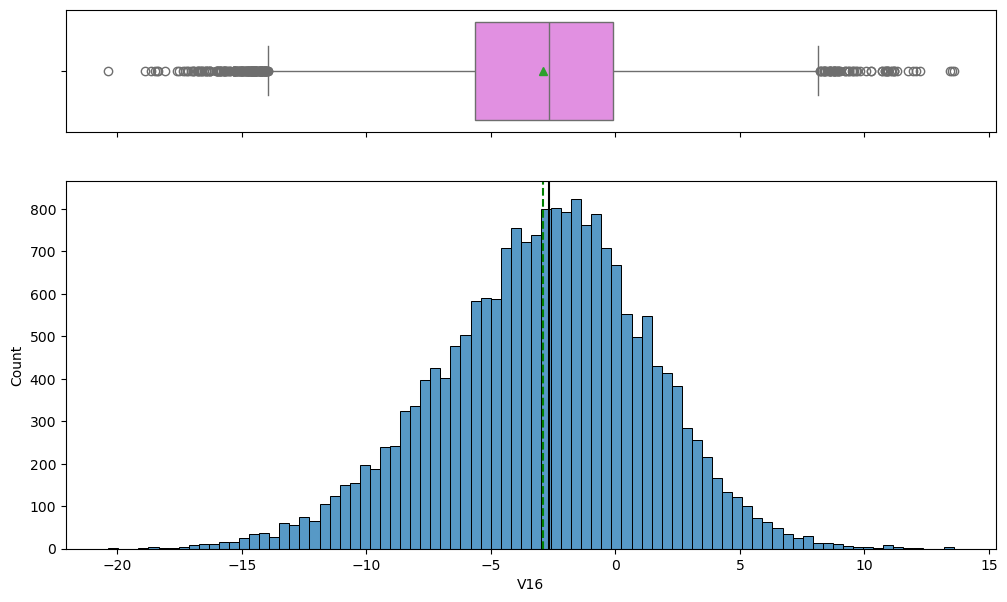

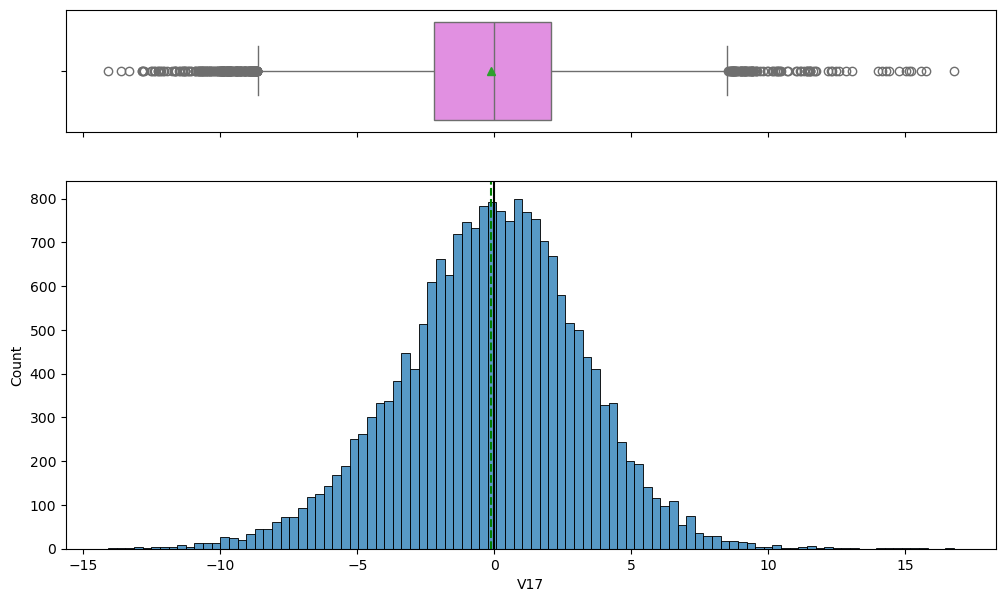

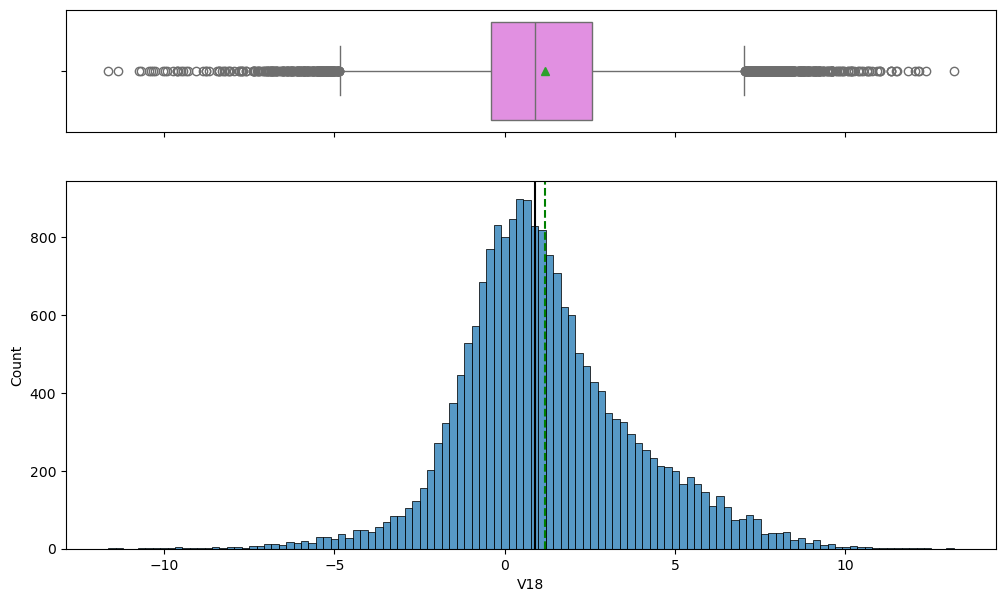

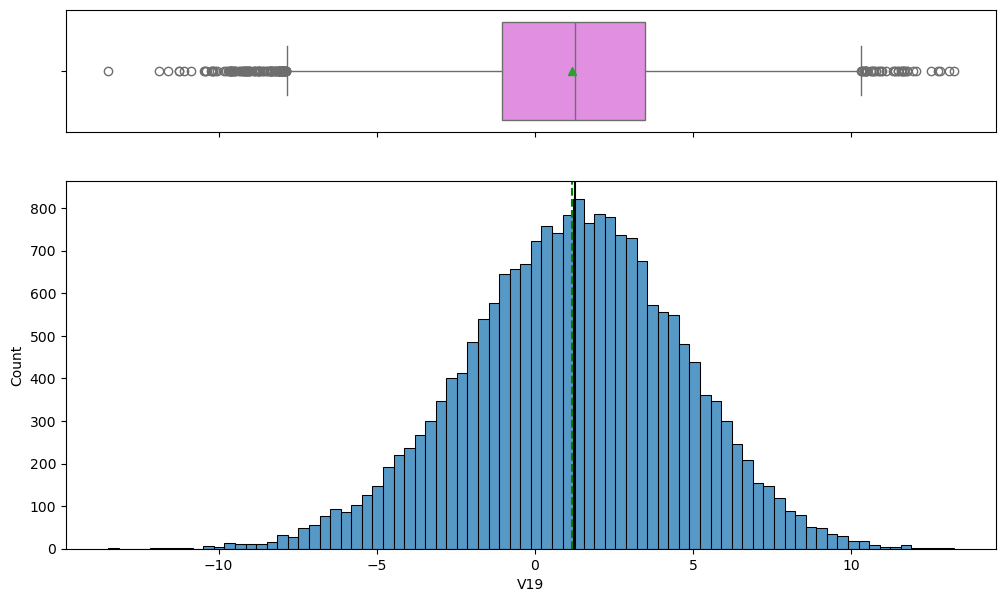

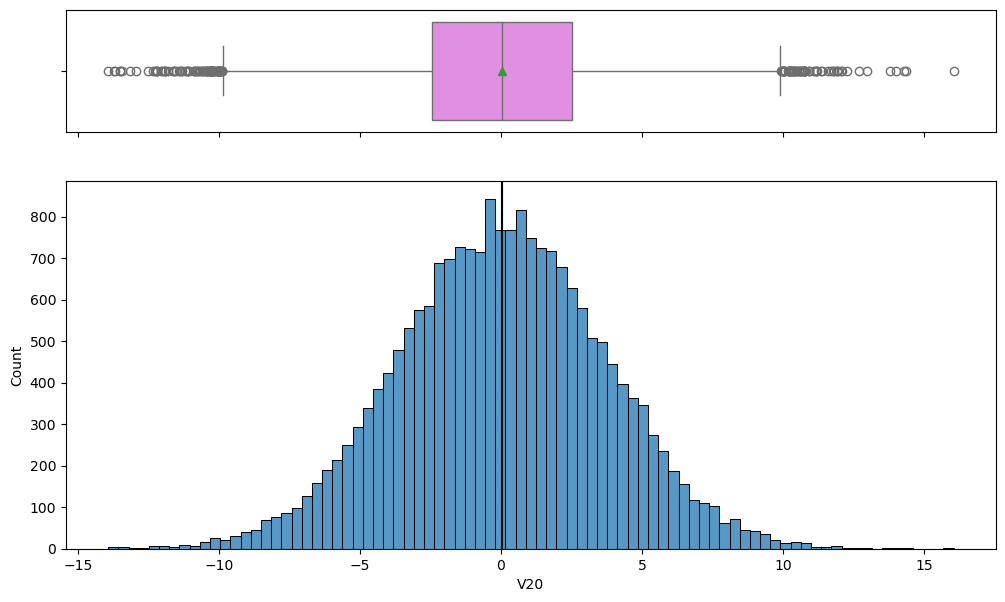

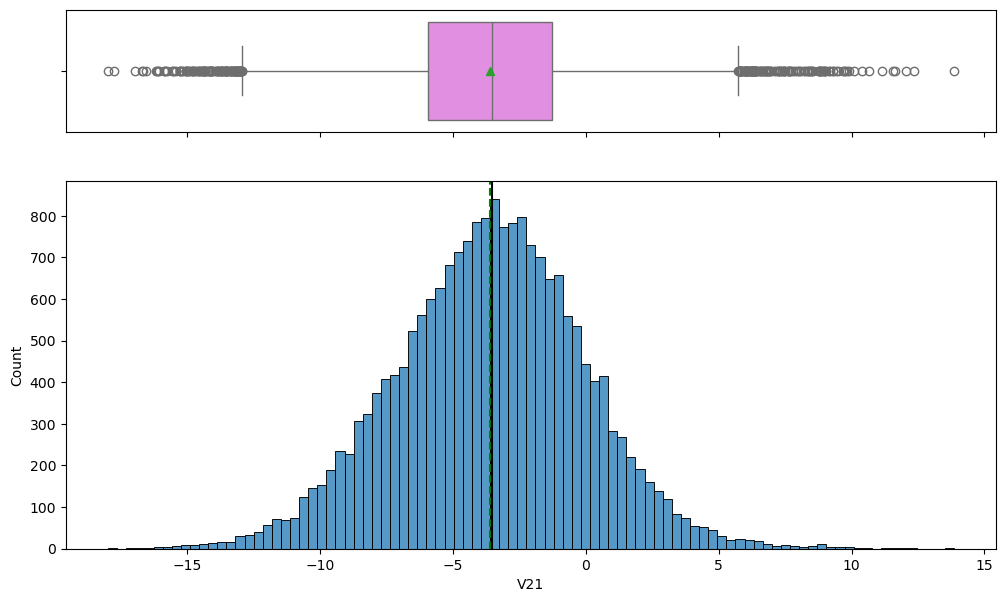

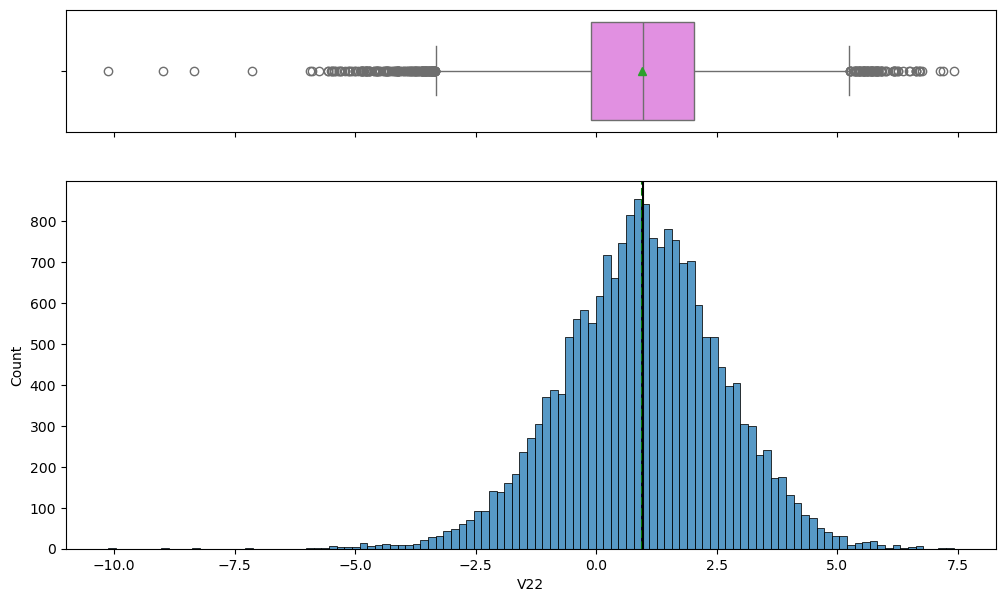

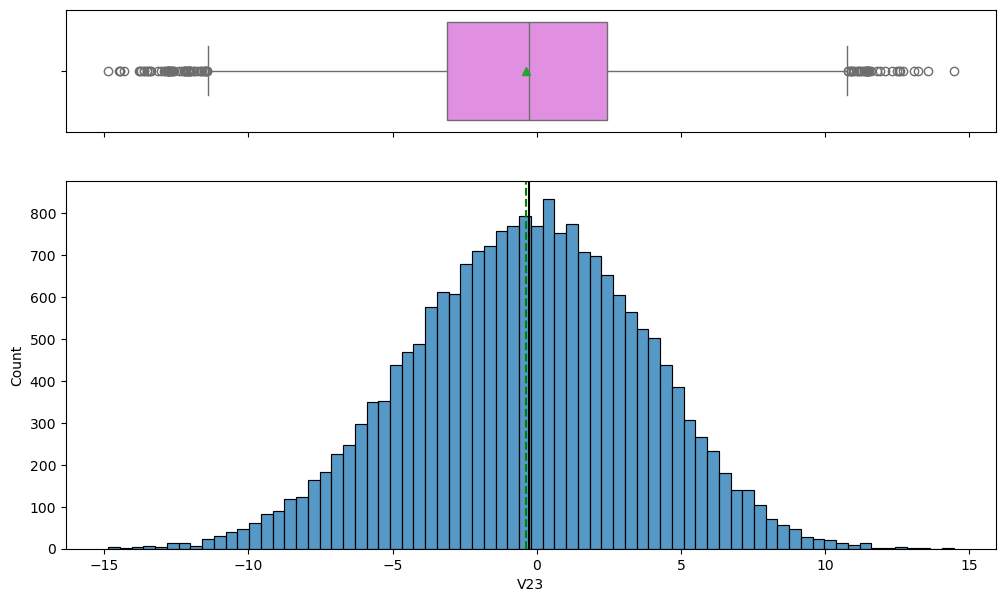

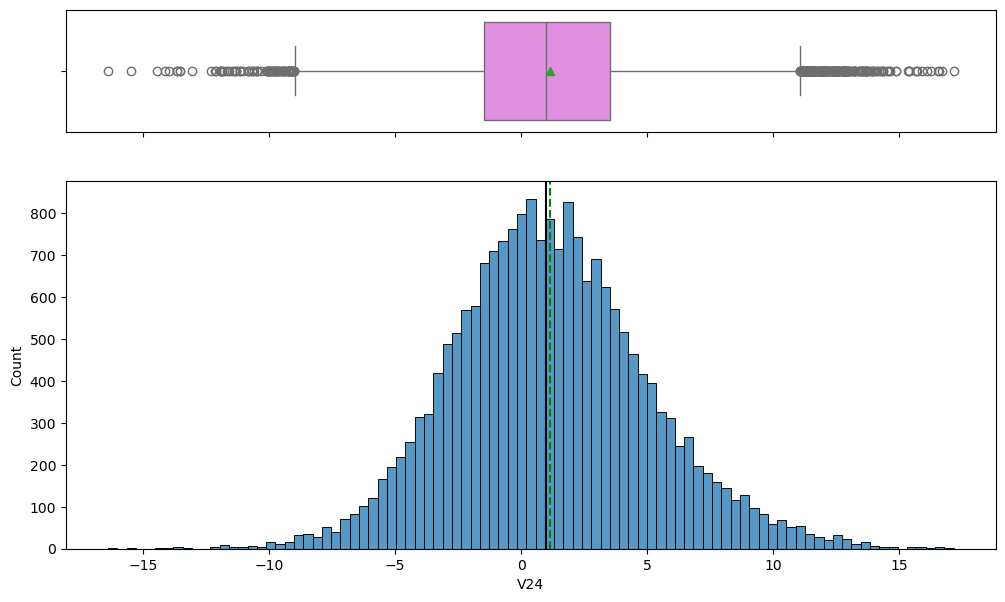

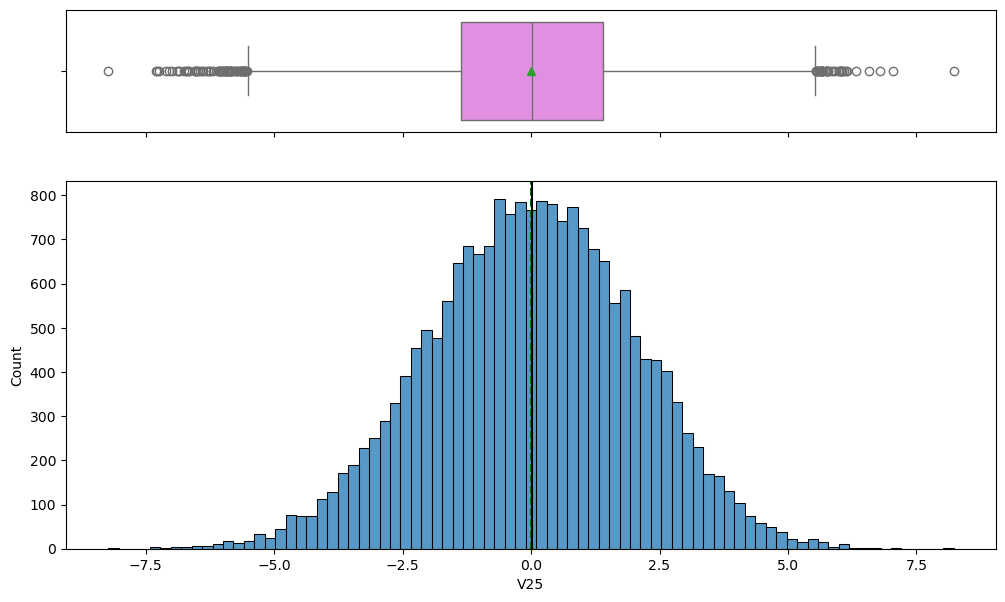

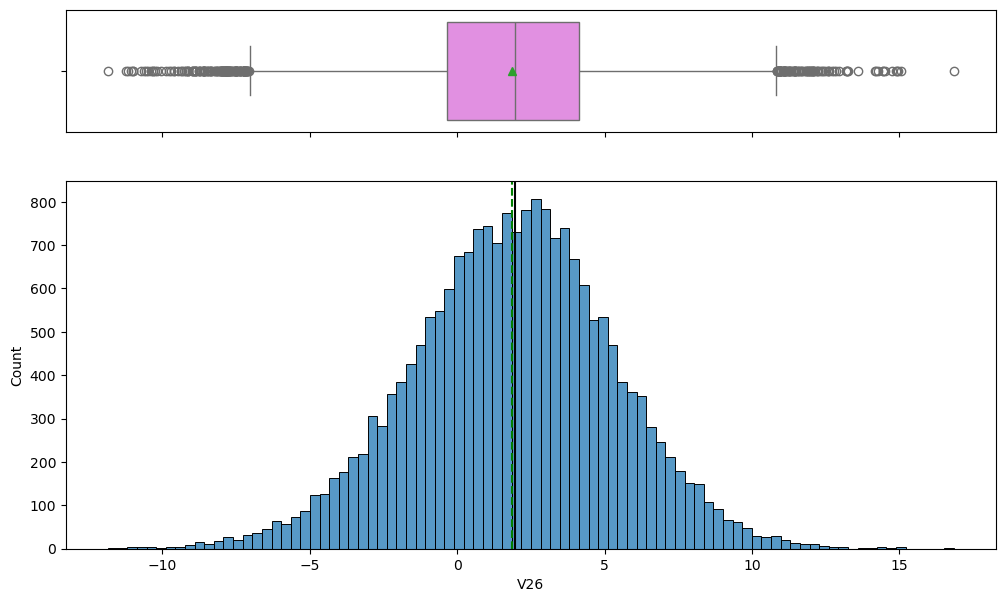

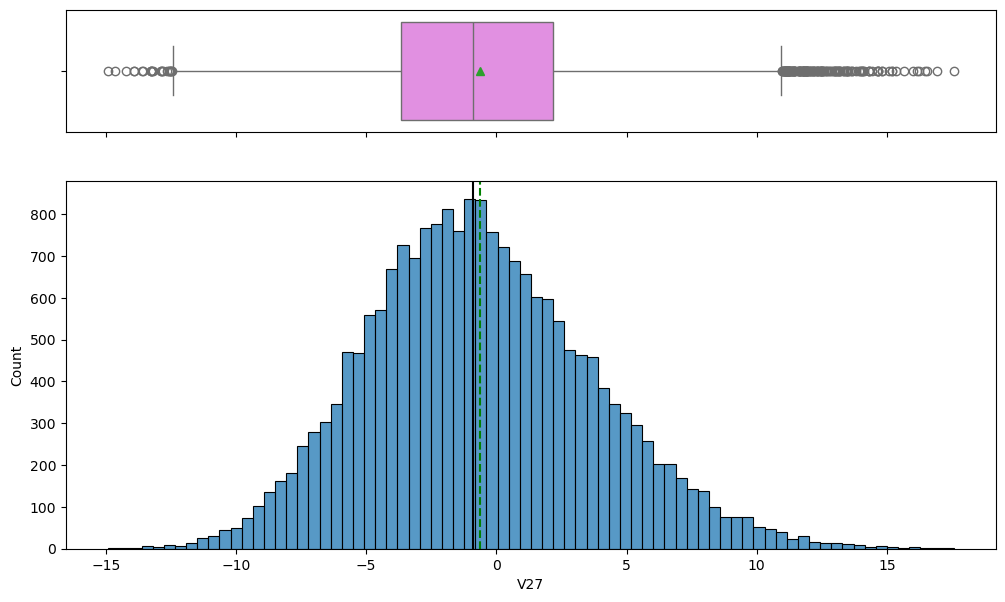

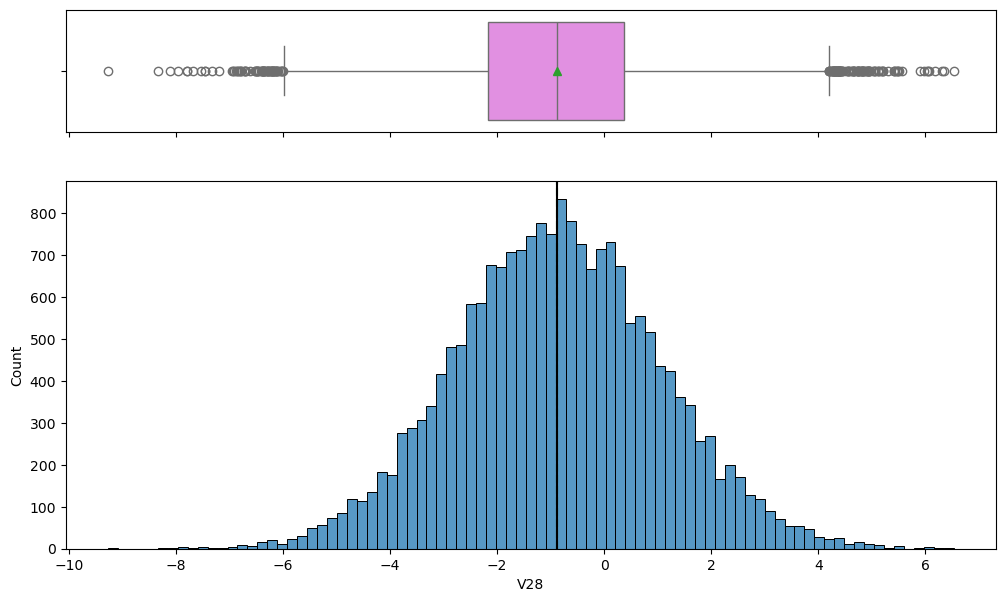

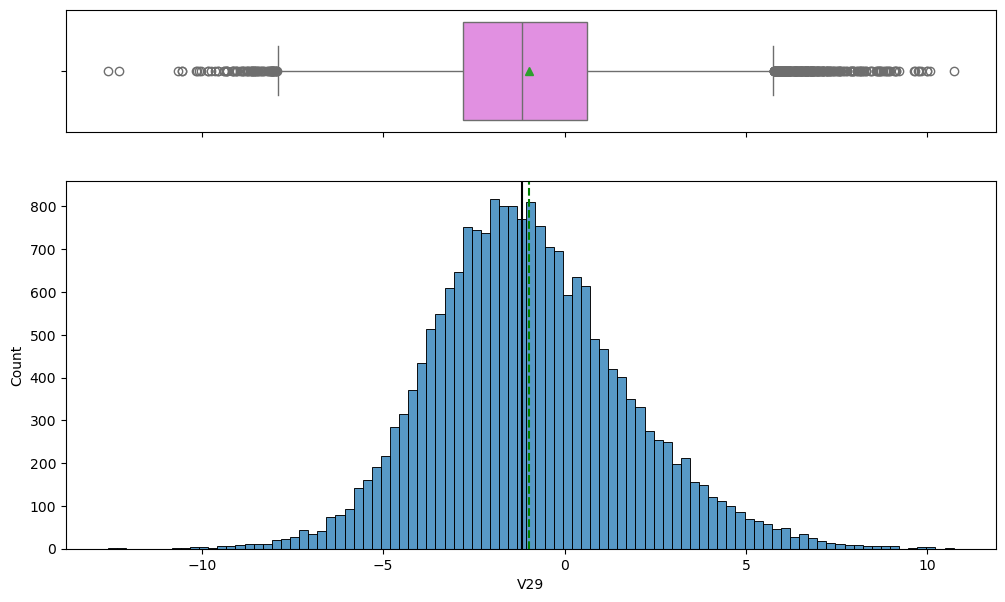

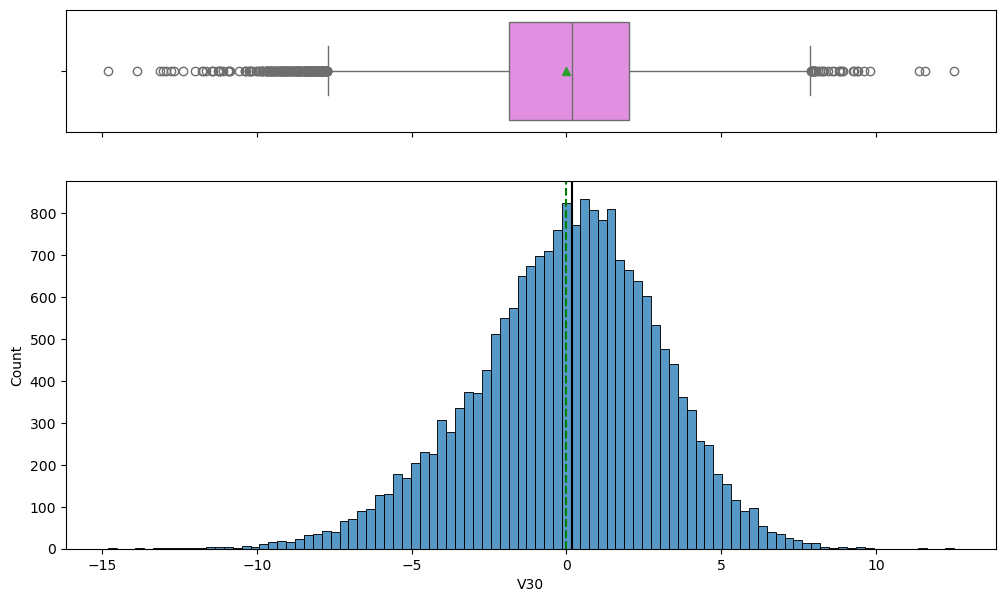

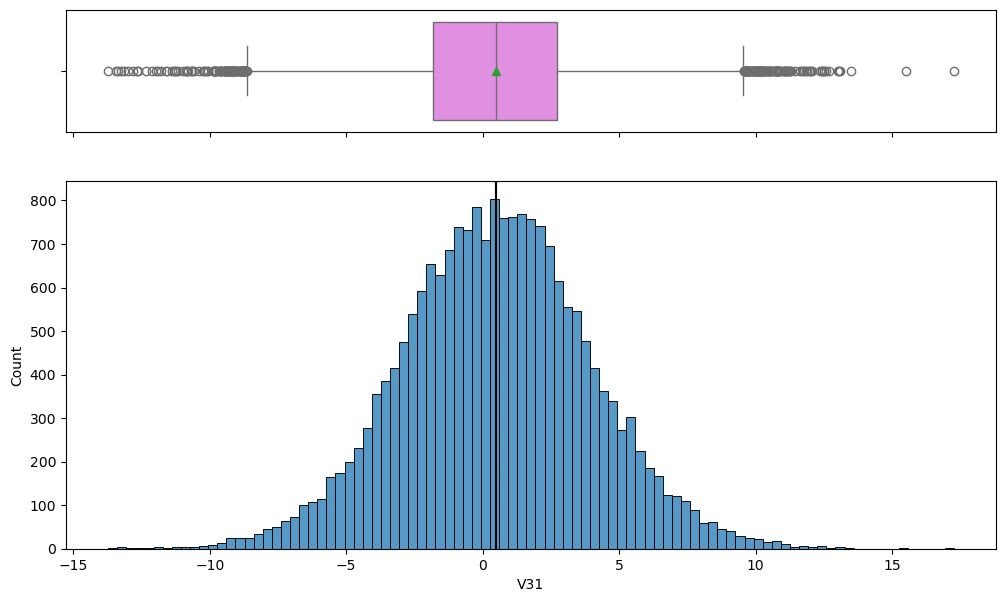

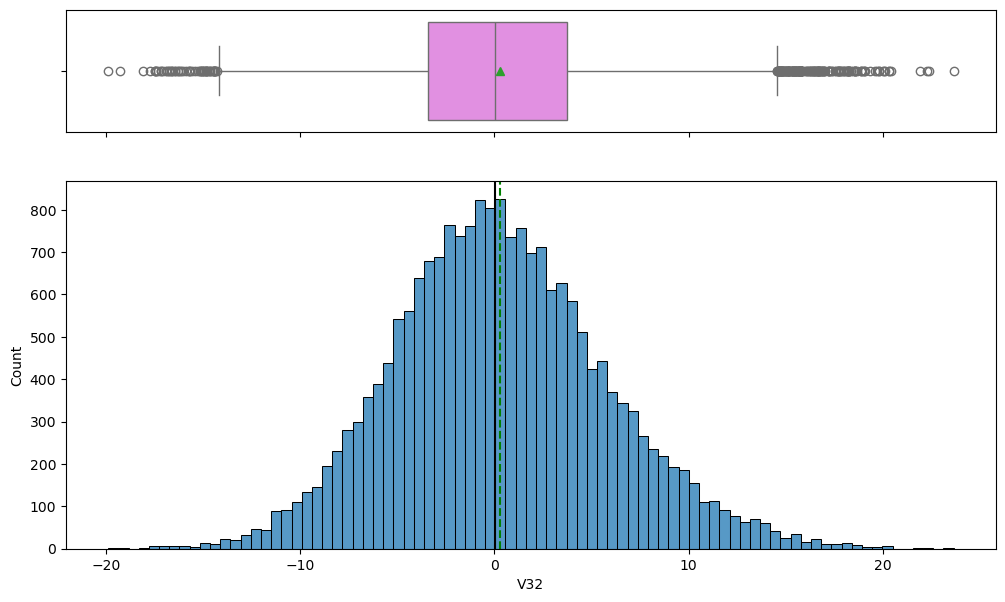

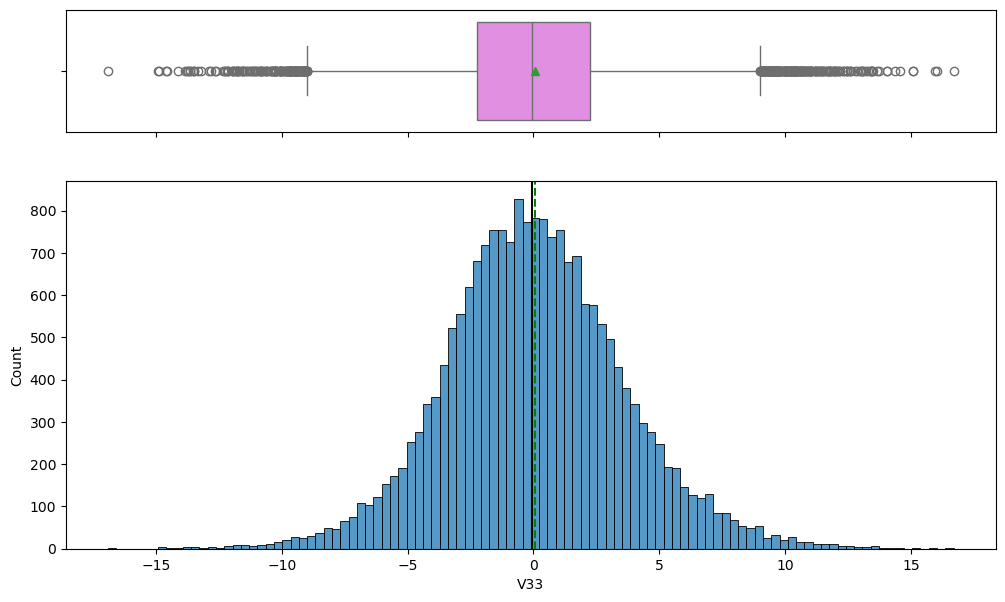

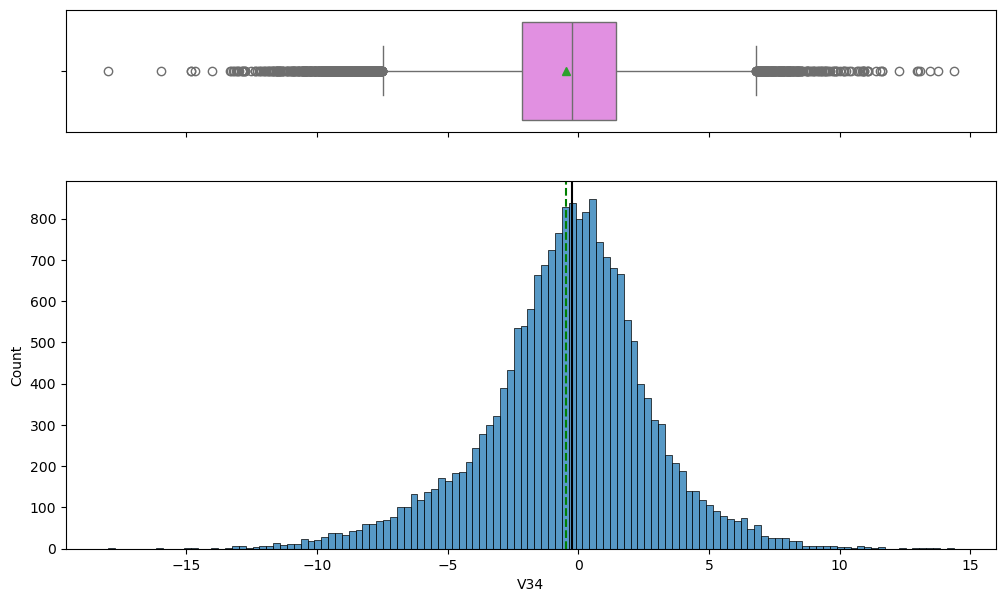

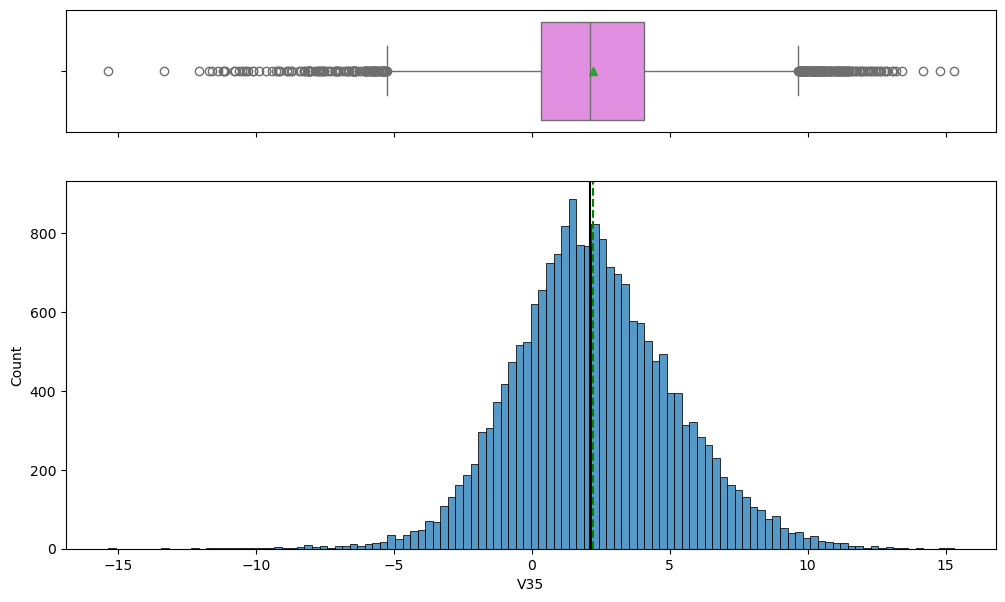

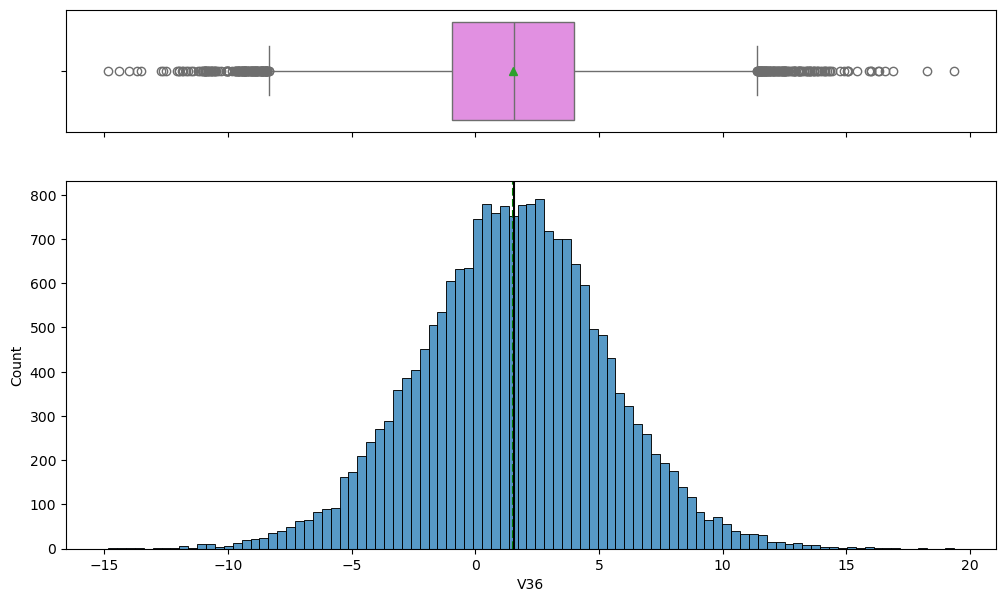

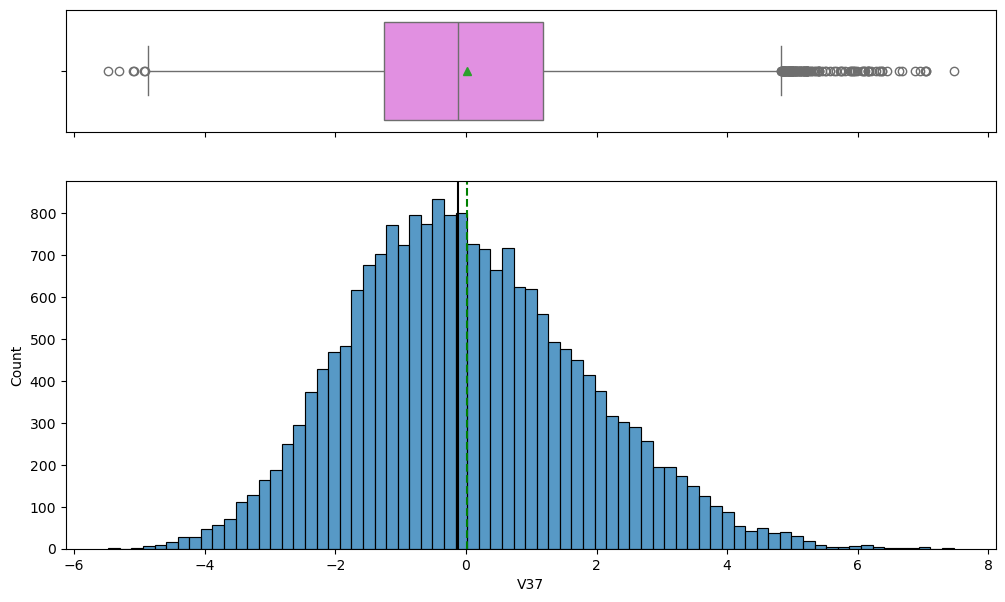

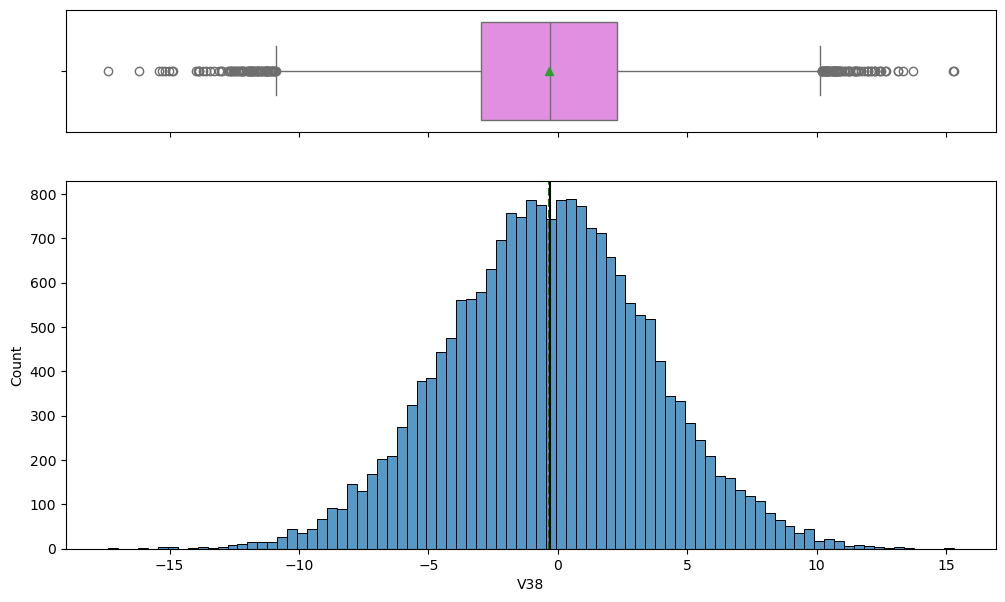

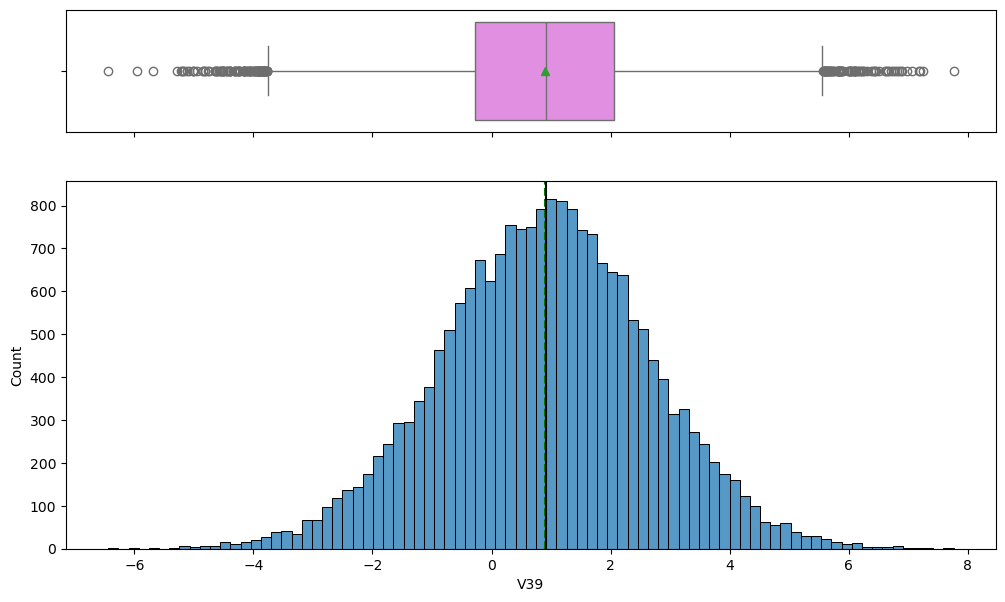

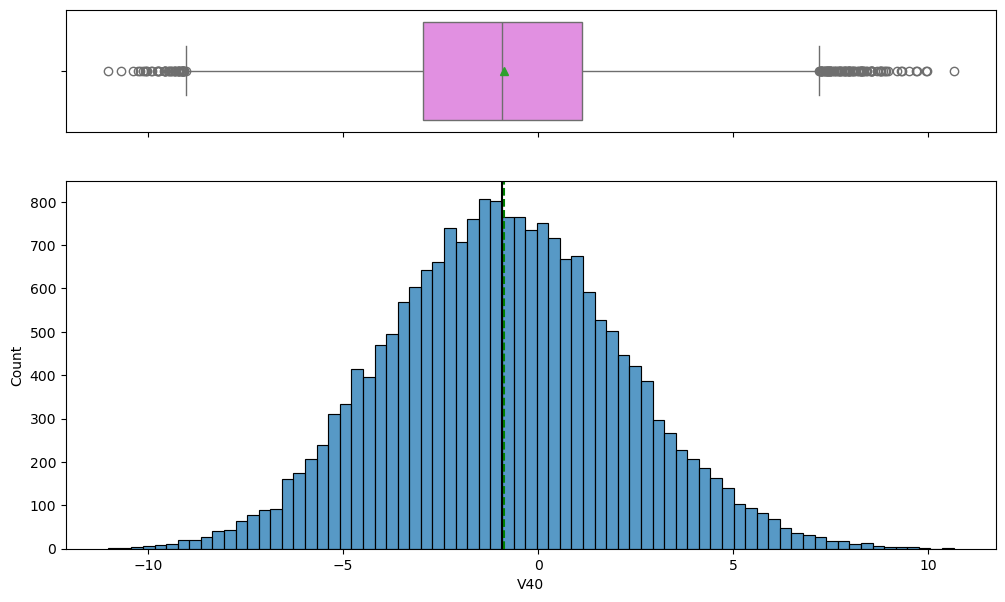

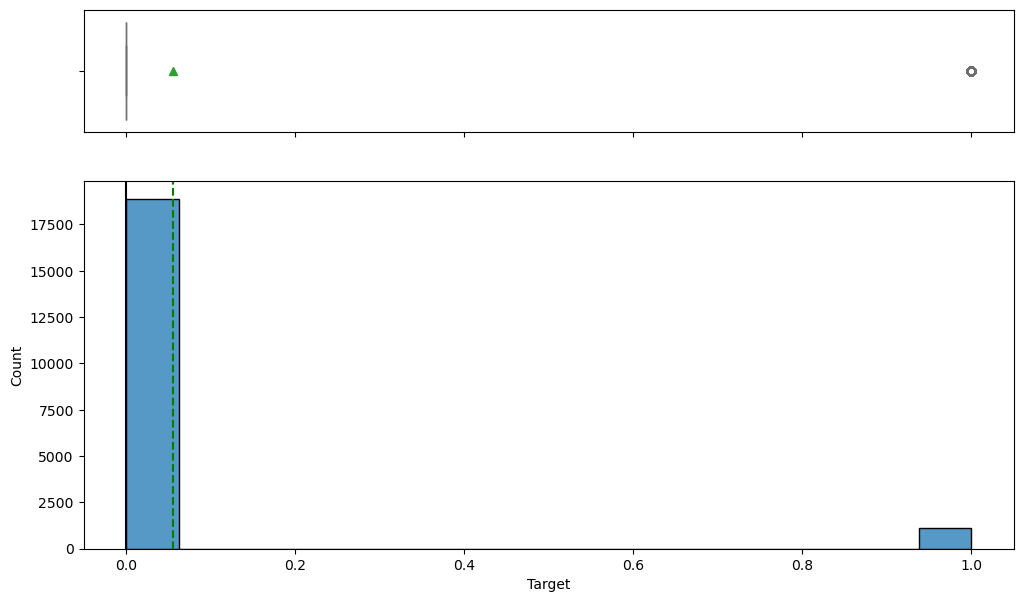

In [23]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

V1 is slightly skewed right but very close to normally distributed.

V2-V16 seems to be normally distrubed.

V17 is left skewed.

V18 very close to normal, rightly skewed.

V19-V21 normally distrubed.

V21 has alot of outliers to the left of the first quartile range.

V21-V26 appear to be normally distrubuted however V26 has more outliers on the right side which slightly skews the data.

V27-V34 appear to be normal.

V35 is slightly skewed to the right.
We are seeing that there are a prevalant amount of outliers present in the data set among all columns.

V36 appears to be normal and has a bimodal distrubution, suggesting the presence of two seperate clusters within the data.

V37 appears to be mostly normal with a slight skew to the right.

V38-V40 appear to be normally distributed.


In [25]:
# Function to calculate bimodality coefficient
def bimodality_coefficient(data):
    n = len(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)  # Fisher's definition (normal ==> 0.0)
    bc = (skewness**2 + 1) / (kurtosis + 3 * ((n-1)**2) / ((n-2)*(n-3)))
    return bc

In [26]:
# Calculate bimodality coefficient
bc = bimodality_coefficient(df)
print(f"Bimodality Coefficient: {bc}")

Bimodality Coefficient: [       nan        nan 0.33239711 0.311849   0.3435648  0.32814776
 0.29561144 0.34476243 0.33764563 0.32937066 0.30692195 0.32115062
 0.28382566 0.34044546 0.2701961  0.32989314 0.29012681 0.26368554
 0.33837394 0.32753735 0.29551524 0.28958364 0.3518265  0.30796033
 0.34601276 0.312295   0.35458353 0.32546354 0.32178949 0.34154356
 0.30614842 0.32820219 0.27460647 0.26759336 0.26862023 0.29926902
 0.37253722 0.32551574 0.32041906 0.34281795 0.99997201]


Suggestion of stong bimodality in "Target" column, as expected.

Bivariate analysis

           V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
V1      1.000  0.314  0.389 -0.295 -0.516  0.176  0.481 -0.361  0.399 -0.022   
V2      0.314  1.000  0.095  0.290  0.384  0.234  0.456 -0.383  0.281 -0.484   
V3      0.389  0.095  1.000 -0.029 -0.360 -0.292 -0.156 -0.412  0.234  0.446   
V4     -0.295  0.290 -0.029  1.000  0.084 -0.470 -0.197  0.035  0.265 -0.107   
V5     -0.516  0.384 -0.360  0.084  1.000  0.156 -0.078  0.168 -0.298 -0.344   
V6      0.176  0.234 -0.292 -0.470  0.156  1.000  0.211 -0.559  0.085 -0.117   
V7      0.481  0.456 -0.156 -0.197 -0.078  0.211  1.000  0.093 -0.244 -0.177   
V8     -0.361 -0.383 -0.412  0.035  0.168 -0.559  0.093  1.000 -0.612 -0.180   
V9      0.399  0.281  0.234  0.265 -0.298  0.085 -0.244 -0.612  1.000 -0.293   
V10    -0.022 -0.484  0.446 -0.107 -0.344 -0.117 -0.177 -0.180 -0.293  1.000   
V11     0.291  0.159 -0.335 -0.364 -0.212  0.710  0.531 -0.194 -0.090 -0.156   
V12    -0.145 -0.159 -0.166 -0.235 -0.01

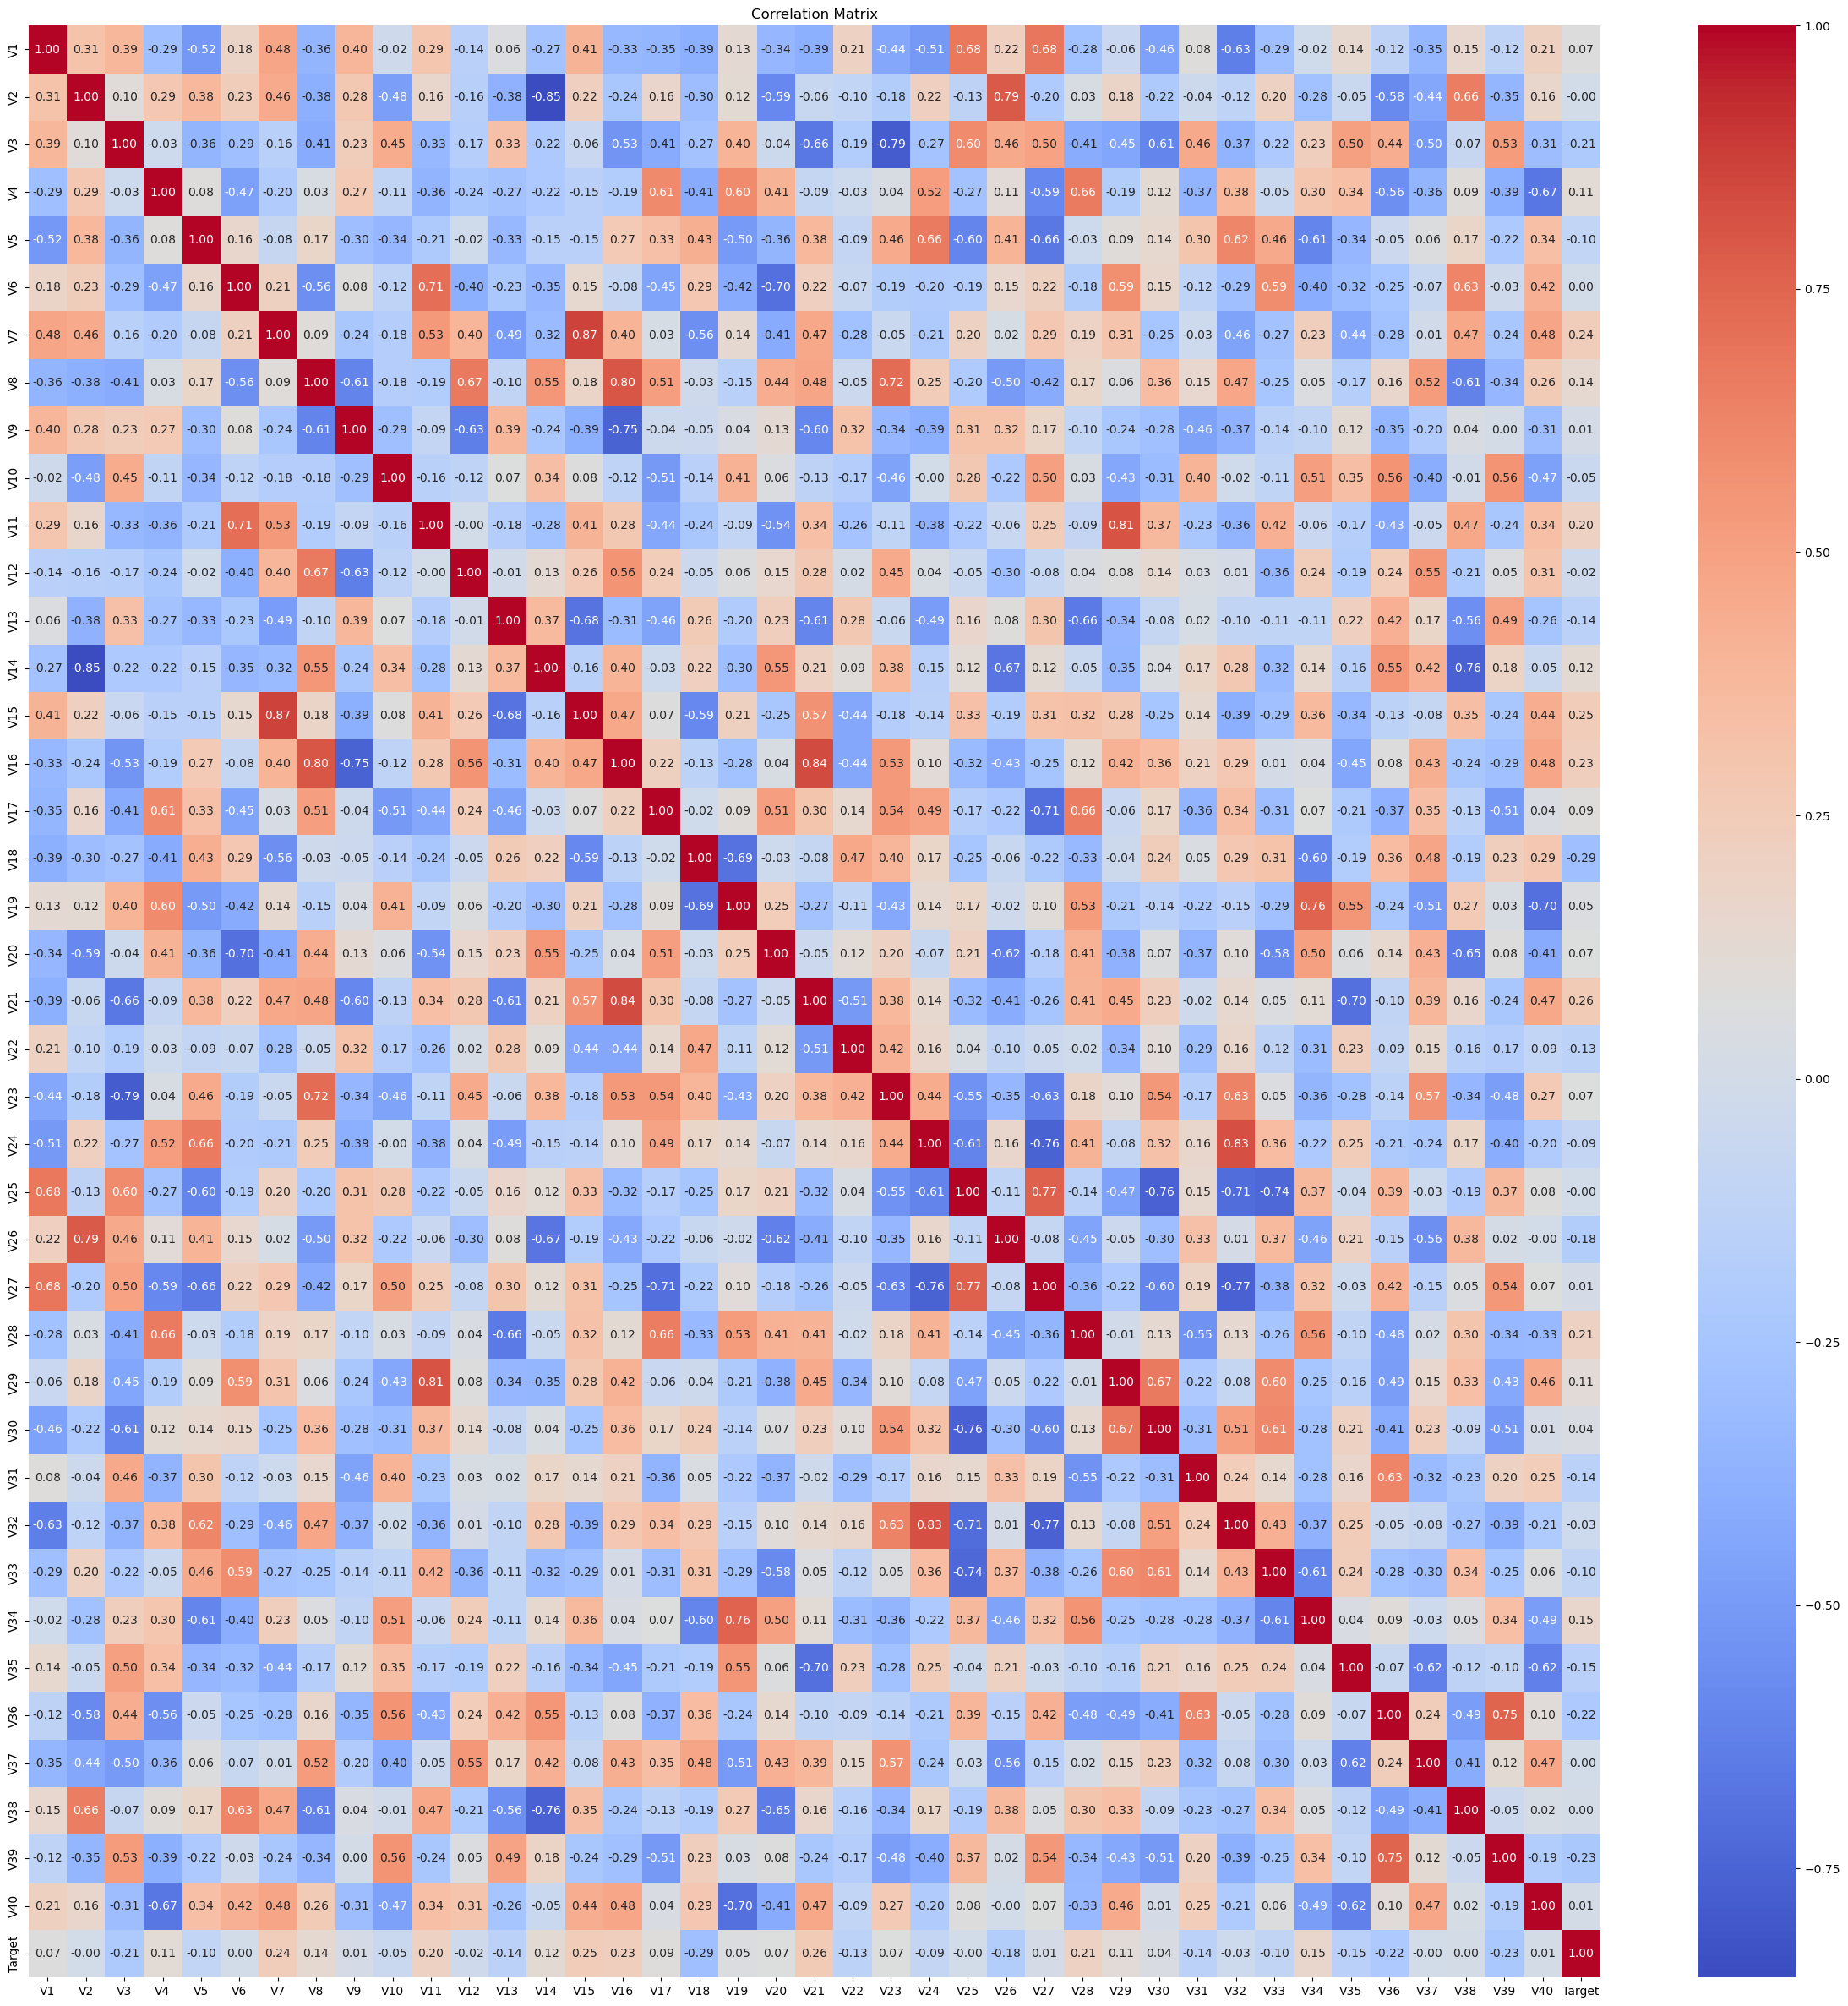

In [29]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Strong negative correlation exists between V14 and V2, V3 and V22, V32 and V27, and V14and V38. Strong positive correlations exist between V36 and V39, V34 and V19, V11 and V28,V24 and V32,V19 and V32, V29 and V11, V23 and V8, V7 and V15, V8 and V16, V26 and V2

## Data Pre-processing

In [32]:
data1 = df.copy()

In [33]:
# Separating target variable and other variables
X = data1.drop(columns="Target")
#identify dependent variable
Y = data1["Target"]

In [34]:
# Separate target variable and other variables for test set
X_test = dfTest.drop(columns="Target")
y_test = dfTest["Target"]

In [35]:

# Split the training data into train and validation sets
# Initial Split: 80% -> X_temp, y_temp; 20% -> X_test, y_test
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

# Secondary Split: 75% of X_temp -> X_train, y_train; 25% of X_temp -> X_val, y_val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)


In [36]:
# Impute missing values
imputer = SimpleImputer(strategy="median")


In [37]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [38]:
# Print shapes of the datasets
print(X_temp.shape, X_val.shape, X_test.shape)



(16000, 40) (4000, 40) (4000, 40)


**Training Set:** 15,000 samples (60% of the original data).
**Validation Set:** 5,000 samples (20% of the original data).
**Test Set:** 5,000 samples (20% of the original data).

In [40]:
# Print shapes of the datasets
print(X_train.shape, X_val.shape, X_test.shape)

(12000, 40) (4000, 40) (4000, 40)


In [41]:
# Checking that no column has missing values in train, validation, or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [47]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [50]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [53]:


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7327236000448882
Bagging: 0.6951520592526091
Random forest: 0.7102457636628886
GBM: 0.7027045225002805
Adaboost: 0.6246661429693636
Xgboost: 0.7927617551341039
Logistic Regression: 0.4729435529121311

Validation Performance:

dtree: 0.7207207207207207
Bagging: 0.6891891891891891
Random forest: 0.7072072072072072
GBM: 0.7387387387387387
Adaboost: 0.6351351351351351
Xgboost: 0.7657657657657657
Logistic Regression: 0.509009009009009


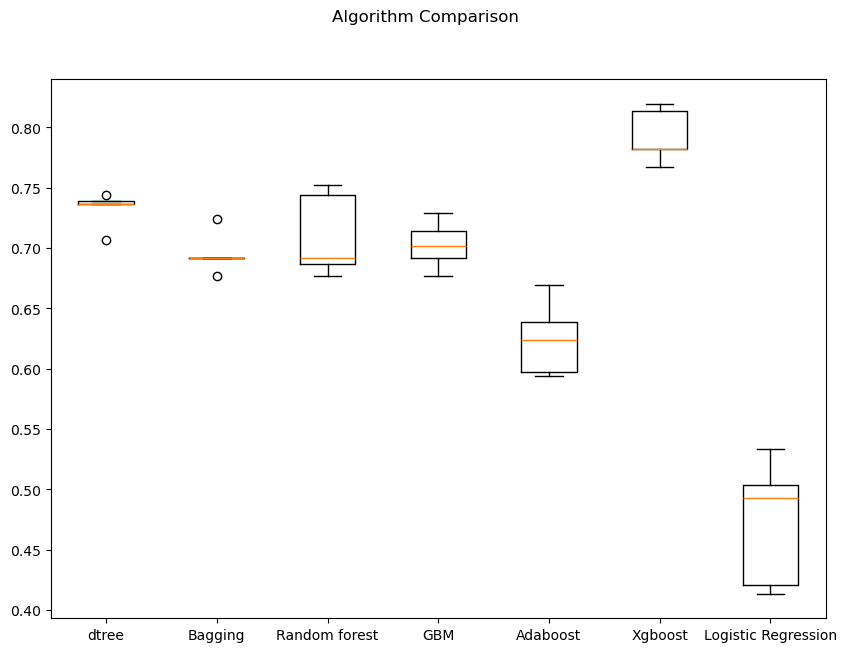

In [54]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

We are seeing that XG Boost and Random Forest,  are giving the highest cross validated recall meaning the model's ability to correctly identify true positive instances across multiple validation sets is high. For this reason, we will tune these three models to see if the performance increases.

### Model Building with Oversampled data


In [57]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


Before OverSampling, counts of label '1': 666
Before OverSampling, counts of label '0': 11334 



In [58]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [59]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

After OverSampling, counts of label '1': 11334
After OverSampling, counts of label '0': 11334 

After OverSampling, the shape of train_X: (22668, 40)
After OverSampling, the shape of train_y: (22668,) 



In [60]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset for Oversampled Data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over,y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset for Oversampled Data:

dtree: 0.9693842074260146
Bagging: 0.9762662881334749
Random forest: 0.9848244761264405
GBM: 0.9241221470338262
Adaboost: 0.8959765404936946
Xgboost: 0.9917065179008382
Logistic Regression: 0.8838004976424084

Validation Performance:

dtree: 0.7387387387387387
Bagging: 0.7972972972972973
Random forest: 0.8333333333333334
GBM: 0.8828828828828829
Adaboost: 0.8603603603603603
Xgboost: 0.8603603603603603
Logistic Regression: 0.8783783783783784


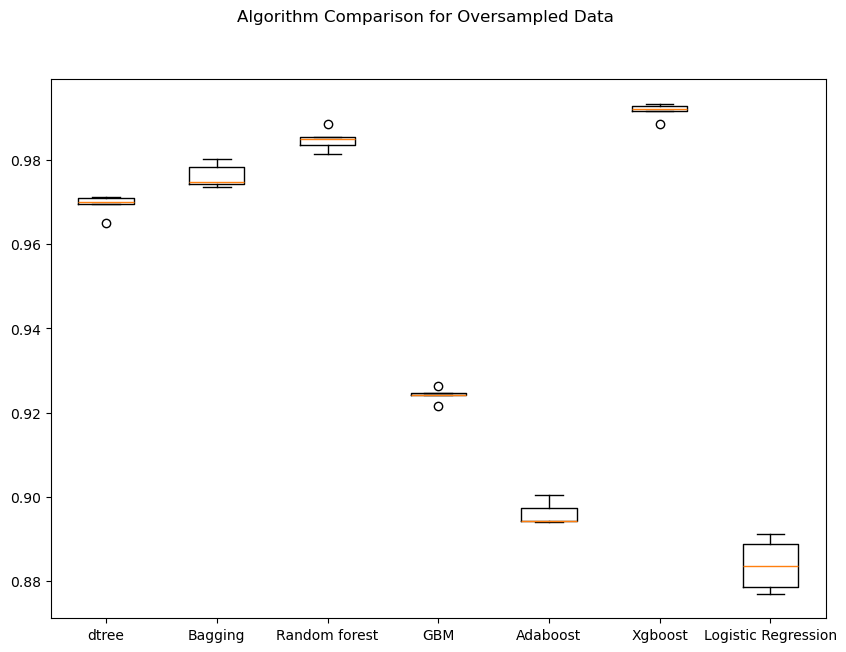

In [61]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison for Oversampled Data")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

Our highest cross validation scores belong to our XG Boost,Random Forest, Bagging and Decision Tree models.

### Model Building with Undersampled data

In [64]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [65]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 666
Before UnderSampling, counts of label '0': 11334 

After UnderSampling, counts of label '1': 666
After UnderSampling, counts of label '0': 666 

After UnderSampling, the shape of train_X: (1332, 40)
After UnderSampling, the shape of train_y: (1332,) 



In [66]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset using Undersampled Data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset using Undersampled Data:

dtree: 0.8303445180114466
Bagging: 0.8559084277858826
Random forest: 0.8934238581528448
GBM: 0.8904500056110425
Adaboost: 0.8694422623723487
Xgboost: 0.8859162832454268
Logistic Regression: 0.8679272808887891

Validation Performance:

dtree: 0.8873873873873874
Bagging: 0.8963963963963963
Random forest: 0.9099099099099099
GBM: 0.9009009009009009
Adaboost: 0.8873873873873874
Xgboost: 0.8918918918918919
Logistic Regression: 0.9054054054054054


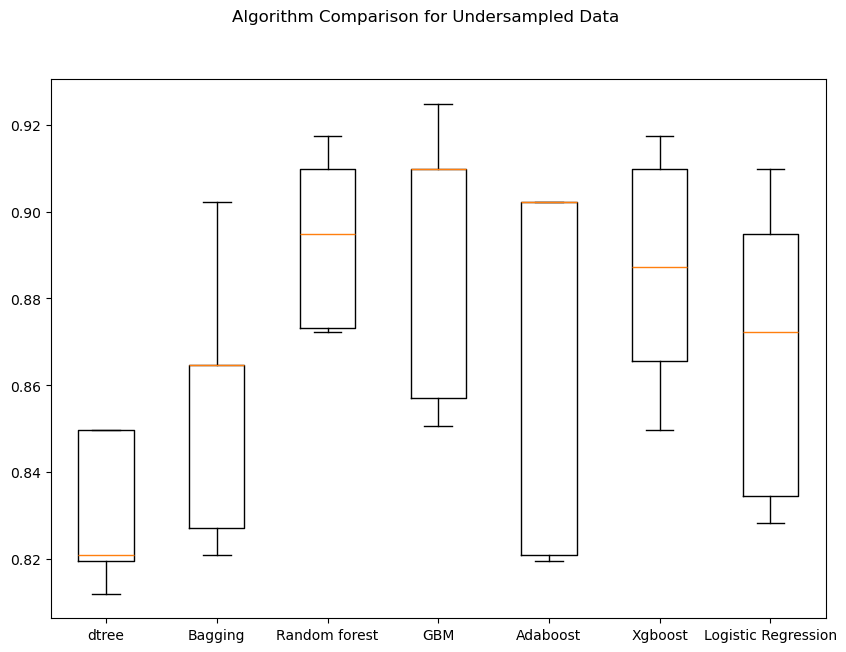

In [67]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison for Undersampled Data")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

For our Undersampled data, the highest cross validation scores belong to our Gradient Boost, Random Forest and our XG Boost models

Based on both models, the undersampled data performed best.

In both oversampled and undersampled data, the validation performance is generally lower than the cross-validation performance. This is because cross-validation helps estimate how well a model generalizes to unseen data, whereas validation performance reflects the performance on a specific  validation set.

## HyperparameterTuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Decision tree with original data

In [74]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5316462798788015:


In [75]:
# Accessing best parameters from RandomizedSearchCV
best_params = randomized_cv.best_params_

# Creating a new DecisionTreeClassifier with best parameters
tuned_dt = DecisionTreeClassifier(
    max_depth=best_params["max_depth"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_leaf_nodes=best_params["max_leaf_nodes"],
    min_impurity_decrease=best_params["min_impurity_decrease"],
    random_state=1
)

# Fitting the tuned model on original data
tuned_dt.fit(X_train, y_train)

# Evaluating performance on training set (assuming recall_score)
dt_train_perfRecall = recall_score(y_train, tuned_dt.predict(X_train))
print("Performance on training set:", dt_train_perfRecall)

# Evaluating performance on validation set (assuming recall_score)
dt_val_perfRecall = recall_score(y_val, tuned_dt.predict(X_val))
print("Performance on validation set:", dt_val_perfRecall)

Performance on training set: 0.5825825825825826
Performance on validation set: 0.536036036036036


In [76]:
# Accessing best parameters from RandomizedSearchCV
best_params = randomized_cv.best_params_

# Function to create and evaluate the model with confusion matrix
def create_and_evaluate_model(model_name, X_train, y_train, X_val, y_val):
    # Create model with best parameters
    tuned_model = model_name(**best_params, random_state=1)
    tuned_model.fit(X_train, y_train)

    # Performance evaluation
    df_perf = model_performance_classification_sklearn(tuned_model, X_train, y_train)
    print(f"Model Performance ({model_name}) on training set:")
    print(df_perf)

    dt_val_perf = recall_score(y_val, tuned_model.predict(X_val))
    print(f"Performance ({model_name}) on validation set (recall):", dt_val_perf)

    # Confusion matrix
    y_pred = tuned_model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    confusion_matrix_sklearn(tuned_model, X_val, y_val)
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()

In [77]:
dt_train_perf = model_performance_classification_sklearn(tuned_dt, X_train, y_train)
dt_train_perf

,Accuracy,Recall,Precision,F1
0,0.974,0.583,0.917,0.713


In [78]:
dt_val_perf = model_performance_classification_sklearn(tuned_dt, X_val, y_val)
dt_val_perf

,Accuracy,Recall,Precision,F1
0,0.970,0.536,0.875,0.665


Model Performance (<class 'sklearn.tree._classes.DecisionTreeClassifier'>) on training set:
   Accuracy  Recall  Precision    F1
0     0.974   0.583      0.917 0.713
Performance (<class 'sklearn.tree._classes.DecisionTreeClassifier'>) on validation set (recall): 0.536036036036036


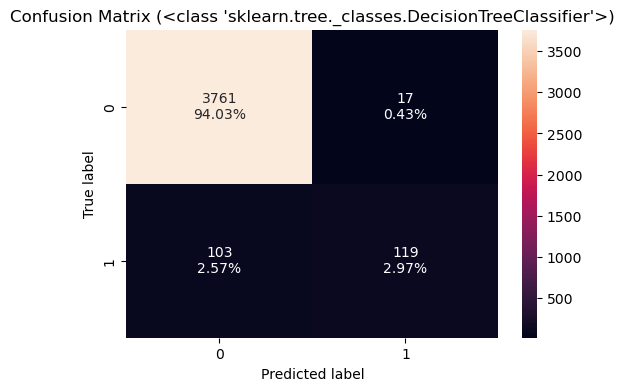

In [79]:
# Using the function for original data
create_and_evaluate_model(DecisionTreeClassifier, X_train, y_train, X_val, y_val)

### Sample tuning method for Decision tree with oversampled data

In [81]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 2} with CV score=0.9123889677716:


In [82]:
# Accessing best parameters from RandomizedSearchCV
best_params = randomized_cv.best_params_

# Creating a new DecisionTreeClassifier with best parameters
tuned_dt = DecisionTreeClassifier(
    max_depth=best_params["max_depth"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_leaf_nodes=best_params["max_leaf_nodes"],
    min_impurity_decrease=best_params["min_impurity_decrease"],
    random_state=1
)

# Fitting the tuned model on original data
tuned_dt.fit(X_train_over, y_train_over)

# Evaluating performance on training set (assuming recall_score)
dt_train_perfRecall = recall_score(y_train_over, tuned_dt.predict(X_train_over))
print("Performance on training set:", dt_train_perfRecall)

# Evaluating performance on validation set (assuming recall_score)
dt_val_perfRecall = recall_score(y_val, tuned_dt.predict(X_val))
print("Performance on validation set:", dt_val_perfRecall)

Performance on training set: 0.9147697194282689
Performance on validation set: 0.9099099099099099


In [83]:
dt_train_perf = model_performance_classification_sklearn(tuned_dt, X_train_over, y_train_over)
dt_train_perf

,Accuracy,Recall,Precision,F1
0,0.768,0.915,0.707,0.797


In [84]:
dt_val_perf = model_performance_classification_sklearn(tuned_dt, X_val, y_val)
dt_val_perf

,Accuracy,Recall,Precision,F1
0,0.641,0.910,0.125,0.219


Model Performance (<class 'sklearn.tree._classes.DecisionTreeClassifier'>) on training set:
   Accuracy  Recall  Precision    F1
0     0.768   0.915      0.707 0.797
Performance (<class 'sklearn.tree._classes.DecisionTreeClassifier'>) on validation set (recall): 0.9099099099099099


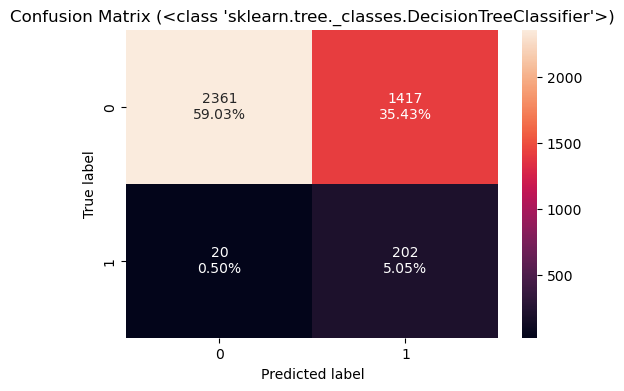

In [85]:
# Using the function for oversampled data (replace X_train with X_train_over and y_train with y_train_over)
create_and_evaluate_model(DecisionTreeClassifier, X_train_over, y_train_over, X_val, y_val)

### Sample tuning method for Decision tree with undersampled data

In [87]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.8168106834249803:


In [88]:
# Accessing best parameters from RandomizedSearchCV
best_params = randomized_cv.best_params_

# Creating a new DecisionTreeClassifier with best parameters
tuned_dt = DecisionTreeClassifier(
    max_depth=best_params["max_depth"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_leaf_nodes=best_params["max_leaf_nodes"],
    min_impurity_decrease=best_params["min_impurity_decrease"],
    random_state=1
)

# Fitting the tuned model on original data
tuned_dt.fit(X_train_un, y_train_un)

# Evaluating performance on training set (assuming recall_score)
dt_train_perfRecall = recall_score(y_train_un, tuned_dt.predict(X_train_un))
print("Performance on training set:", dt_train_perfRecall)

# Evaluating performance on validation set (assuming recall_score)
dt_val_perfRecall = recall_score(y_val, tuned_dt.predict(X_val))
print("Performance on validation set:", dt_val_perfRecall)

Performance on training set: 0.8708708708708709
Performance on validation set: 0.8693693693693694


In [89]:
dt_train_perf = model_performance_classification_sklearn(tuned_dt, X_train_un, y_train_un)
dt_train_perf

,Accuracy,Recall,Precision,F1
0,0.881,0.871,0.890,0.880


In [90]:
dt_val_perf = model_performance_classification_sklearn(tuned_dt, X_val, y_val)
dt_val_perf

,Accuracy,Recall,Precision,F1
0,0.877,0.869,0.294,0.439


Model Performance (<class 'sklearn.tree._classes.DecisionTreeClassifier'>) on training set:
   Accuracy  Recall  Precision    F1
0     0.881   0.871      0.890 0.880
Performance (<class 'sklearn.tree._classes.DecisionTreeClassifier'>) on validation set (recall): 0.8693693693693694


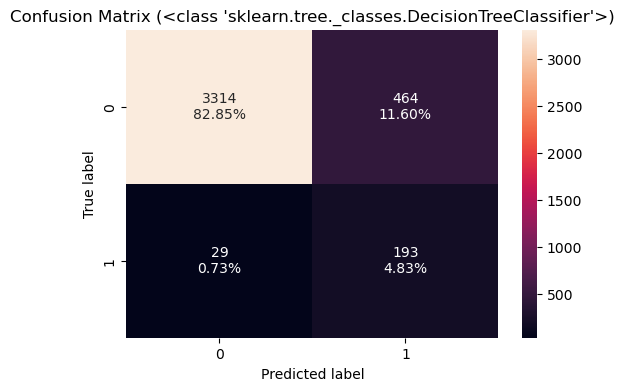

In [91]:
# Using the function for undersampled data for confusion matrix
create_and_evaluate_model(DecisionTreeClassifier, X_train_un, y_train_un, X_val, y_val)

### Sample tuning method for Random Forest with Original Data


In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {



    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Accessing best parameters from RandomizedSearchCV
best_params = randomized_cv.best_params_

# Creating a new RandomForestClassifier with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features=best_params["max_features"],  # Accessing best max_features
    random_state=1,
    max_samples=best_params["max_samples"],    # Accessing best max_samples
    n_estimators=best_params["n_estimators"],  # Accessing best n_estimators
    min_samples_leaf=best_params["min_samples_leaf"],  # Accessing best min_samples_leaf
)

# Fitting the tuned model on undersampled data
tuned_rf2.fit(X_train, y_train)  # Assuming X_train_un is your undersampled data

# Evaluating performance on undersampled training set (assuming recall_score)
rf2_train_perfRecall = recall_score(y_train, tuned_rf2.predict(X_train))
print("Performance on undersampled training set:", rf2_train_perfRecall)

# Evaluating performance on validation set
rf2_val_perfRecall = recall_score(y_val, tuned_rf2.predict(X_val))
print("Performance on validation set:", rf2_val_perfRecall)

In [ ]:
rf2_train_perf = model_performance_classification_sklearn(tuned_rf2, X_train, y_train)
rf2_train_perf

In [ ]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)
rf2_val_perf

In [ ]:
# Using the function for undersampled data (replace X_train with X_train_un and y_train with y_train_un)
create_and_evaluate_model(RandomForestClassifier, X_train, y_train, X_val, y_val)

### Sample tuning method for Random Forest with Oversampled Data

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Accessing best parameters from RandomizedSearchCV
best_params = randomized_cv.best_params_

# Creating a new RandomForestClassifier with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features=best_params["max_features"],  # Accessing best max_features
    random_state=1,
    max_samples=best_params["max_samples"],    # Accessing best max_samples
    n_estimators=best_params["n_estimators"],  # Accessing best n_estimators
    min_samples_leaf=best_params["min_samples_leaf"],  # Accessing best min_samples_leaf
)

# Fitting the tuned model on undersampled data
tuned_rf2.fit(X_train_over, y_train_over)  # Assuming X_train_un is your undersampled data

# Evaluating performance on undersampled training set (assuming recall_score)
rf2_train_perfRecall = recall_score(y_train_over, tuned_rf2.predict(X_train_over))
print("Performance on undersampled training set:", rf2_train_perfRecall)

# Evaluating performance on validation set
rf2_val_perfRecall = recall_score(y_val, tuned_rf2.predict(X_val))
print("Performance on validation set:", rf2_val_perfRecall)

In [ ]:
rf2_train_perf = model_performance_classification_sklearn(tuned_rf2, X_train_over, y_train_over)
rf2_train_perf

In [ ]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)
rf2_val_perf

In [ ]:
# Using the function for undersampled data (replace X_train with X_train_un and y_train with y_train_un)
create_and_evaluate_model(RandomForestClassifier, X_train_over, y_train_over, X_val, y_val)

### Sample tuning method for Random Forest with Undersampled Data

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Accessing best parameters from RandomizedSearchCV
best_params = randomized_cv.best_params_

# Creating a new RandomForestClassifier with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features=best_params["max_features"],  # Accessing best max_features
    random_state=1,
    max_samples=best_params["max_samples"],    # Accessing best max_samples
    n_estimators=best_params["n_estimators"],  # Accessing best n_estimators
    min_samples_leaf=best_params["min_samples_leaf"],  # Accessing best min_samples_leaf
)

# Fitting the tuned model on undersampled data
tuned_rf2.fit(X_train_un, y_train_un)  # Assuming X_train_un is your undersampled data

# Evaluating performance on undersampled training set (assuming recall_score)
rf2_train_perfRecall = recall_score(y_train_un, tuned_rf2.predict(X_train_un))
print("Performance on undersampled training set:", rf2_train_perfRecall)

# Evaluating performance on validation set
rf2_val_perfRecall = recall_score(y_val, tuned_rf2.predict(X_val))
print("Performance on validation set:", rf2_val_perfRecall)

In [ ]:
rf2_train_perf = model_performance_classification_sklearn(tuned_rf2, X_train_un, y_train_un)
rf2_train_perf

In [ ]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)
rf2_val_perf

In [ ]:
# Using the function for undersampled data (replace X_train with X_train_un and y_train with y_train_un)
create_and_evaluate_model(RandomForestClassifier, X_train_un, y_train_un, X_val, y_val)

# Gradient Boost

### Sample Tuning Method of Gradient Boost on original data

---



In [ ]:
%%time


# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=.7,
    random_state=1,
    learning_rate=best_params["learning_rate"],
    n_estimators=best_params["n_estimators"],
    subsample=.7,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm.fit(X_train, y_train)

In [ ]:
gbm_train_perf = model_performance_classification_sklearn(tuned_gbm, X_train, y_train)
gbm_train_perf

In [ ]:
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val_perf

In [ ]:
create_and_evaluate_model(GradientBoostingClassifier, X_train, y_train, X_val, y_val)

###Sample Gradient Boost on Oversampled Data

In [ ]:
%%time


# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=best_params["max_features"],
    random_state=1,
    learning_rate=best_params["max_features"],
    n_estimators=best_params["n_estimators"],
    subsample=best_params["subsample"],
)## Complete the code with the best parameters obtained from tuning

tuned_gbm.fit(X_train_over, y_train_over)

In [ ]:
gbm_train_perf = model_performance_classification_sklearn(tuned_gbm, X_train_over, y_train_over)
gbm_train_perf

In [ ]:
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val_perf

In [ ]:
create_and_evaluate_model(GradientBoostingClassifier, X_train_over, y_train_over, X_val, y_val)

###Sample Gradient Boost on Undersampled Data

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=best_params["max_features"],
    random_state=1,
    learning_rate=best_params["max_features"],
    n_estimators=best_params["n_estimators"],
    subsample=best_params["subsample"],
)## Complete the code with the best parameters obtained from tuning
tuned_gbm.fit(X_train_un, y_train_un)

In [ ]:
gbm_train_perf = model_performance_classification_sklearn(tuned_gbm, X_train_un, y_train_un)
gbm_train_perf

In [ ]:
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val_perf

In [ ]:
create_and_evaluate_model(GradientBoostingClassifier, X_train_un, y_train_un, X_val, y_val)

##Ada Boost

### Sample ADA Boost on Original Data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

# Creating new pipeline with best parameters (assuming max_depth is found)
tuned_ada = AdaBoostClassifier(
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    base_estimator=DecisionTreeClassifier(max_depth=3,random_state=1)
)
tuned_ada.fit(X_train, y_train)

In [ ]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val)
ada_train_perf

In [ ]:
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val)
ada_val_perf

In [ ]:
create_and_evaluate_model(AdaBoostClassifier, X_train, y_train, X_val, y_val)

###Sample ADA Boost on Oversampled Data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators= best_params["n_estimators"], learning_rate= best_params["learning_rate"], base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada.fit(X_train_over, y_train_over)

In [ ]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
ada_train_perf

In [ ]:
ada_val_perf = model_performance_classification_sklearn(tuned_ada,X_val, y_val)
ada_val_perf

In [ ]:
create_and_evaluate_model(AdaBoostClassifier, X_train_over, y_train_over, X_val, y_val)

### Sample ADA Boost on Undersampled Data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators= best_params["n_estimators"], learning_rate= best_params["learning_rate"], base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada.fit(X_train_un, y_train_un)

In [ ]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_un, y_train_un)
ada_train_perf

In [ ]:
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val)
ada_val_perf

In [ ]:
create_and_evaluate_model(AdaBoostClassifier, X_train_un, y_train_un, X_val, y_val)

## Bagging

### Sample Bagging on Original Data

In [ ]:
%%time
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Using best parameters to create a new pipeline
best_params = randomized_cv.best_params_
tuned_bagging = BaggingClassifier(
    max_samples=best_params['max_samples'],
    max_features=best_params['max_features'],
    n_estimators=best_params['n_estimators'],
    random_state=1
)

# Fitting the model on the training data
tuned_bagging.fit(X_train, y_train)

In [ ]:
bagging_train_perf = model_performance_classification_sklearn(tuned_bagging, X_val, y_val)
bagging_train_perf

In [ ]:
bagging_val_perf = model_performance_classification_sklearn(tuned_bagging, X_train, y_train)
bagging_val_perf

In [ ]:
create_and_evaluate_model(BaggingClassifier, X_train, y_train, X_val, y_val)

### Sample Bagging on Oversampled Data

In [ ]:
%%time
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Using best parameters to create a new pipeline
best_params = randomized_cv.best_params_
tuned_bagging = BaggingClassifier(
    max_samples=best_params['max_samples'],
    max_features=best_params['max_features'],
    n_estimators=best_params['n_estimators'],
    random_state=1
)

# Fitting the model on the training data
tuned_bagging.fit(X_train_over, y_train_over)

In [ ]:
bagging_train_perf = model_performance_classification_sklearn(tuned_bagging, X_train_over, y_train_over)
bagging_train_perf

In [ ]:
bagging_val_perf = model_performance_classification_sklearn(tuned_bagging, X_val, y_val)
bagging_val_perf

In [ ]:
create_and_evaluate_model(BaggingClassifier, X_train_over, y_train_over, X_val, y_val)

### Sample Bagging on Undersampled Data


In [ ]:
%%time
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Using best parameters to create a new pipeline
best_params = randomized_cv.best_params_
tuned_bagging = BaggingClassifier(
    max_samples=best_params['max_samples'],
    max_features=best_params['max_features'],
    n_estimators=best_params['n_estimators'],
    random_state=1
)

# Fitting the model on the training data
tuned_bagging.fit(X_train_un, y_train_un)

In [ ]:
bagging_train_perf = model_performance_classification_sklearn(tuned_bagging, X_train_un, y_train_un)
bagging_train_perf

In [ ]:
bagging_val_perf = model_performance_classification_sklearn(tuned_bagging, X_val, y_val)
bagging_val_perf

In [ ]:
create_and_evaluate_model(BaggingClassifier, X_train_un, y_train_un, X_val, y_val)

# Logistic Regression

### Sample Logistic Regression on Original Data

In [ ]:
%%time
# Define the Logistic Regression model
Model = LogisticRegression(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid = {'C': np.arange(0.1, 1.1, 0.1)}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

# Creating a new LogisticRegression model with the best parameters
tuned_log = LogisticRegression(C=best_params['C'], random_state=1)

# Fitting the model to the training data
tuned_log.fit(X_train, y_train)

# Print model to confirm
print(tuned_log)
tuned_log.fit(X_train, y_train)

In [ ]:
log_train_perf = model_performance_classification_sklearn(tuned_log, X_train, y_train)
log_train_perf

In [ ]:
log_val_perf = model_performance_classification_sklearn(tuned_log,X_val, y_val)
log_val_perf

In [ ]:
create_and_evaluate_model(LogisticRegression, X_train, y_train, X_val, y_val)

### Sample Logistic Regression on Oversampled Data

In [ ]:
%%time
# Define the Logistic Regression model
Model = LogisticRegression(random_state=1)
# Parameter grid for RandomizedSearchCV
param_grid = {'C': np.arange(0.1, 1.1, 0.1)}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

# Creating a new LogisticRegression model with the best parameters
tuned_log = LogisticRegression(C=best_params['C'], random_state=1)

# Fitting the model to the training data
tuned_log.fit(X_train_over, y_train_over)

# Print model to confirm
print(tuned_log)
tuned_log.fit(X_train_over, y_train_over)

In [ ]:
log_train_perf = model_performance_classification_sklearn(tuned_log, X_train_over, y_train_over)
log_train_perf

In [ ]:
log_val_perf = model_performance_classification_sklearn(tuned_log,X_val, y_val)
log_val_perf

In [ ]:
create_and_evaluate_model (LogisticRegression, X_train_over, y_train_over, X_val, y_val)

### Sample Logistic Regression on Undersampled Data

In [ ]:
%%time
# Define the Logistic Regression model
Model = LogisticRegression(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid = {'C': np.arange(0.1, 1.1, 0.1)}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

# Creating a new LogisticRegression model with the best parameters
tuned_log = LogisticRegression(C=best_params['C'], random_state=1)

# Fitting the model to the training data
tuned_log.fit(X_train_un, y_train_un)

# Print model to confirm
print(tuned_log)
tuned_log.fit(X_train_un, y_train_un)

In [ ]:
log_train_perf = model_performance_classification_sklearn(tuned_log, X_train_un, y_train_un)
log_train_perf

In [ ]:
log_val_perf = model_performance_classification_sklearn(tuned_log, X_val, y_val)
log_val_perf

In [ ]:
create_and_evaluate_model(LogisticRegression, X_train_un, y_train_un, X_val, y_val)

## XG Boost

### Sample XG Boost on Original Data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=best_params["subsample"],
    scale_pos_weight=best_params["scale_pos_weight"],
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    gamma=best_params["gamma"],
)## Complete the code with the best parameters obtained from tuning

xgb2.fit(X_train, y_train) ## Complete the code to fit the model on over sampled data

In [ ]:
xgb2_train_perf = model_performance_classification_sklearn(xgb2, X_train, y_train) ## Complete the code to check the performance on oversampled train set
xgb2_train_perf

In [ ]:
xgb2_val_perf = model_performance_classification_sklearn(xgb2, X_val, y_val)## Complete the code to check the performance on validation set
xgb2_val_perf

In [ ]:
create_and_evaluate_model(XGBClassifier, X_train, y_train, X_val, y_val)

### Sample XG Boost on Oversampled Data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=best_params["subsample"],
    scale_pos_weight=best_params["scale_pos_weight"],
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    gamma=best_params["gamma"],
)## Complete the code with the best parameters obtained from tuning

xgb2.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

In [ ]:
xgb2_train_perf = model_performance_classification_sklearn(xgb2, X_train_over, y_train_over) ## Complete the code to check the performance on oversampled train set
xgb2_train_perf

In [ ]:
xgb2_val_perf = model_performance_classification_sklearn(xgb2, X_val, y_val)## Complete the code to check the performance on validation set
xgb2_val_perf

In [ ]:
create_and_evaluate_model(XGBClassifier, X_train_over, y_train_over, X_val, y_val)

### Sample XG Boost on Undersampled Data


In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
best_params = randomized_cv.best_params_

xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=best_params["subsample"],
    scale_pos_weight=best_params["scale_pos_weight"],
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    gamma=best_params["gamma"],
)## Complete the code with the best parameters obtained from tuning

xgb2.fit(X_train_un, y_train_un) ## Complete the code to fit the model on over sampled data

In [ ]:
xgb2_train_perf = model_performance_classification_sklearn(xgb2, X_train_un, y_train_un) ## Complete the code to check the performance on oversampled train set
xgb2_train_perf

In [ ]:
xgb2_val_perf = model_performance_classification_sklearn(xgb2, X_val, y_val)## Complete the code to check the performance on validation set
xgb2_val_perf

In [ ]:
create_and_evaluate_model(XGBClassifier, X_train_un, y_train_un, X_val, y_val)

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
       dt_train_perf.T,rf2_train_perf.T,gbm_train_perf.T,ada_train_perf.T,bagging_train_perf.T,log_train_perf.T,xgb2_train_perf.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision tree",
    "Random Forest",
    "Gradient Boosting",
    "AdaBoost",
    "Bagging",
    "Logistic Regression",
    "XG Boost"
]
print("Training performance comparison:")
models_train_comp_df

Random Forest achieves near-perfect accuracy, recall, and precision on the training data, making it the top performer in terms of training metrics.Gradient Boosting also scores perfectly across all metrics on the training data, showing exceptional performance.AdaBoost matches Gradient Boosting's perfect scores on the training data, indicating excellent model performance.Bagging also achieves perfect metrics on the training data, similar to Gradient Boosting and AdaBoost.XG Boost performs well but does not match the perfect scores of the other models, though it is still a strong performer.Logistic Regression has the lowest scores among the models in the training data but still performs reasonably well. These high scores among all models indicate a possible overfitting issue.

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
       dt_val_perf.T,rf2_val_perf.T,gbm_val_perf.T,ada_val_perf.T,bagging_val_perf.T,log_val_perf.T,xgb2_val_perf.T

    ],
    axis=1,
)
models_val_comp_df.columns = [
  "Decision tree",
    "Random Forest",
    "Gradient Boosting",
    "AdaBoost",
    "Bagging",
    "Logistic Regression",
    "XG Boost"
]
print("Validation performance comparison:")
models_val_comp_df

Random Forest shows high accuracy and recall on validation data but struggles with precision, impacting the F1 score.Gradient Boosting has slightly lower accuracy and precision compared to Random Forest but maintains good recall.AdaBoost's performance is similar to Random Forest's, with high accuracy and recall but lower precision.Bagging performs well in accuracy and recall but also has lower precision.XG Boost has the lowest accuracy and precision on validation data, though recall is relatively high.Logistic Regression performs adequately in terms of accuracy and recall but has the lowest precision and F1 score.

Random Forest has the highest accuracy (0.947) and F1-score (0.655) on the validation data, indicating it generalizes well to unseen data.Random Forest seems to be the best choice due to its high validation accuracy and F1-score, suggesting good generalization to unseen data.

### Test set final performance

In [ ]:
# Calculating different metrics on the test set
rf2_test = model_performance_classification_sklearn(tuned_rf2, X_test, y_test)
print("Test performance:")
rf2_test

The Random Forest model achieved a test accuracy of 0.933, which is very good. However, there's a significant gap between precision (0.449) and recall (0.878). This suggests the model might be predicting some negative cases as positive (high recall) but struggling to identify true positives accurately (low precision).

In [ ]:
feature_names = X.columns
importances = tuned_rf2.feature_importances_
indices = np.argsort(importances)[-5:]

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


The 5 most important features of this model are V36, V18, V39, V15 and V7.

## Pipelines to build the final model


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
# Separating target variable and other variables
X = data1.drop(columns="Target")
#identify dependent variable
Y = data1["Target"]

In [ ]:

# Separate target variable and other variables for test set
X_test = dfTest.drop(columns="Target")
y_test = dfTest["Target"]

# Define numerical features
numerical_features = [f"V{i}" for i in range(1, 41)]

# Create a transformer for numerical variables
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Create a column transformer that applies the numerical transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features)
    ]
)

# Create a pipeline with RandomForestClassifier
model = Pipeline(steps=[
    ("pre", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        min_samples_leaf=1,
        max_samples=0.6,
        max_features='sqrt',
        random_state=1
    ))
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y
)

print(X_train.shape, X_test.shape)

# Fit the model on training data
model.fit(X_train, y_train)

# Evaluate the model on the test set
def model_performance_classification_sklearn(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred)

# Print performance metrics
print(model_performance_classification_sklearn(model, X_test, y_test))

In [ ]:
best_model= randomized_cv.best_estimator_

Model_test = model_performance_classification_sklearn(best_model, X_test, y_test)
Model_test

The model performs well in identifying true negatives (class 0) with high precision (0.99) but struggles with identifying true positives (class 1) due to low precision (0.23). This suggests a high number of false positives for class 1. The model also misses some actual class 0 instances (false negatives) as indicated by the lower recall (0.82) for class 0.

# Business Insights and Conclusions

The model seems to have a high number of false positives (predicting failures that don't occur) for class 1 (failures).  Since the cost of repair is lower than replacement, and inspection cost is lower than repair, it might be beneficial to explore cost-sensitive learning techniques. This would prioritize correctly identifying actual failures (reducing false negatives) even if it leads to some additional inspections (false positives). A real time suggestion we would like to bring to the table is deploying the model in real-world scenarios and monitoring its performance over time.Additionally, we suggest ReneWind to collect data on actual failures and use it to retrain and improve the model's accuracy and ability to identify true failures.

Depending on company cost structures and risk tolerance, ReneWind might consider setting a threshold on the model's probability output for predicting failures. For example, they might only take action (schedule an inspection) if the model predicts a failure with a probability higher than a certain value (e.g., 70%). This can help balance the cost of inspections with catching actual failures.

Other factors we would suggest to explore are a cost-benefit analysis teamed with the model's metrics.

In [ ]:
#!jupyter nbconvert --to html "/content/MT_Project_LearnerNotebook_FullCode (2).ipynb"


***